In [5]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
from math import sqrt
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np
from math import pi

def wrap(job,job_id,task_id):
    def singlerun(kf,phit,phi,L,run,duration):
        import numpy as np
        rm=0.005
        D=1.
        R=2*rm
        rng = GSLRandomNumberGenerator()
        rng.seed(run)   
        f=1.0208582         
        rv=rm*f
        td =(2*rv)**2/(6*D)   
        kd = 4*math.pi*R*D*2
        kb=kf*kd
        with species_attributes():
            C | {'D':str(0.0),'radius':str(rv)}
            E | {'D':str(D),'radius':str(rv)}
            S | {'D':str(D),'radius':str(rv)}
            ES | {'D':str(0.0),'radius':str(rv)}
        with reaction_rules():
            #E+S >ES | kb
            E+S>~E+~S|kb


        m=get_model()
        w = spatiocyte.SpatiocyteWorld(Real3(L,L,L),rv,rng)
        w.bind_to(m)
        size=tuple(w.calculate_shape(Real3(L,L,L),rv))    
        Nev = size[0]*size[1]*size[2]
        NS=int(Nev*phit)
        NE=int(NS/5)
        Nc=int(Nev*phi)            
        w.add_molecules(Species('C'), Nc)
        w.add_molecules(Species('S'), NS)
        w.add_molecules(Species('E'), NE)
        sim = spatiocyte.SpatiocyteSimulator(w)
        sim.initialize()
        #duration = duration*td
        obs=FixedIntervalNumberObserver(td,['E','S'])
        sim.run(duration,obs)        
        #tlogs,nalog=np.array(obs.data()).T
        if run==1:
            print('kf={},phit={},phi={},L={}'.format(kf,phit,phi,L))
            #print('td={:.4e},kb={:.4e},kr={:.4e},kub={:.4e},kon={:.4e},Nc={},NE={},NS={},duration={:.4e}'.format(td,kb,kr,kub,kon,Nc,NE,NS,duration))
        return obs.data()#tlogs,nalog
    job.update({'run':task_id})
    out=singlerun(**job)
    return out

def exe(jobs,simrun):    
    #res=ensemble.run_multiprocessing(wrap,jobs,n=simrun,nproc=60,modules=('numpy','ecell4','math'))[0]
    res=ensemble.run_slurm(wrap,jobs,n=simrun,nproc=100,path='tmp',modules=('numpy','ecell4','math'),extra_args=['--exclude=ibc[02,12,27]'])[0]
    res = np.array(res)
    meanres = np.mean(res,axis=0)   
    tt=meanres.T[0]
    Ne=meanres.T[1]
    Ns=meanres.T[2]
    #Nes=meanres.T[3]
    name='/home/chew/outputdata/3Dirxncrowding_kf{:.1f}_phi{:.1f}phit{:.3f}L{}_Nratio5'.format(jobs[0]["kf"],jobs[0]["phi"],jobs[0]["phit"],jobs[0]["L"])
    f=open(name,'w')
    np.savetxt(name,np.column_stack([tt,Ns,Ne]),delimiter=',')
    f.close()    
    print(name,len(tt))
    plt.plot(tt,Ne,label='E')
    plt.semilogx(tt,Ns,label='S')
    #plt.plot(tt,Nes,label='ES')
    print('first',Ns[0],'last',Ns[-1])
    print('first',Ne[0],'last',Ne[-1])
    plt.legend()

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


DEBUG:sge:Submitted batch job 3018387
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018387_[1-100%100     debug sge-ireq     chew PD       0:00      1 (None)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-00:52:38      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-00:52:38      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-00:52:38      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-22:53:11      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-22:53:11      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-22:53:11      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-22:53:11      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-22:53:11      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-22:53:11      1 ibc19
DEBUG:sge:       

DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:22:47      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-21:49:04      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-21:48:58      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-21:48:55      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-21:48:52      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-21:48:52      1 ibc19
DEBUG:sge:         3018238_1     debug sge-8qij     chew  R      26:55      1 ibc06
DEBUG:sge:         3018238_2     debug sge-8qij     chew  R      26:55      1 ibc06
DEBUG:sge:         3018238_3     debug sge-8qij     chew  R      26:55      1 ibc06
DEBUG:sge:         3018238_4     debug sge-8qij     chew  R      26:55      1 ibc06
DEBUG:sge:         3018238_5     debug sge-8qij     chew  R      26:55      1 ibc06
DEBUG:sge:         3018238_6     debug sge-8qij     chew  R      26:55

DEBUG:sge:        3018387_85     debug sge-ireq     chew  R       0:09      1 ibc08
DEBUG:sge:        3018387_86     debug sge-ireq     chew  R       0:09      1 ibc08
DEBUG:sge:        3018387_87     debug sge-ireq     chew  R       0:09      1 ibc08
DEBUG:sge:        3018387_88     debug sge-ireq     chew  R       0:09      1 ibc08
DEBUG:sge:        3018387_89     debug sge-ireq     chew  R       0:09      1 ibc08
DEBUG:sge:        3018387_90     debug sge-ireq     chew  R       0:09      1 ibc08
DEBUG:sge:        3018387_91     debug sge-ireq     chew  R       0:09      1 ibc08
DEBUG:sge:        3018387_92     debug sge-ireq     chew  R       0:09      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R       0:09      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R       0:09      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R       0:09      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R       0:09      

DEBUG:sge:        3018387_22     debug sge-ireq     chew  R       0:19      1 ibc28
DEBUG:sge:        3018387_23     debug sge-ireq     chew  R       0:19      1 ibc28
DEBUG:sge:        3018387_24     debug sge-ireq     chew  R       0:19      1 ibc28
DEBUG:sge:        3018387_25     debug sge-ireq     chew  R       0:19      1 ibc28
DEBUG:sge:        3018387_26     debug sge-ireq     chew  R       0:19      1 ibc28
DEBUG:sge:        3018387_27     debug sge-ireq     chew  R       0:19      1 ibc28
DEBUG:sge:        3018387_28     debug sge-ireq     chew  R       0:19      1 ibc28
DEBUG:sge:        3018387_29     debug sge-ireq     chew  R       0:19      1 ibc28
DEBUG:sge:        3018387_30     debug sge-ireq     chew  R       0:19      1 ibc06
DEBUG:sge:        3018387_31     debug sge-ireq     chew  R       0:19      1 ibc05
DEBUG:sge:        3018387_32     debug sge-ireq     chew  R       0:19      1 ibc05
DEBUG:sge:        3018387_33     debug sge-ireq     chew  R       0:19      

DEBUG:sge:           2762400     debug plane_03    niina  R 22-22:53:41      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-22:53:41      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-22:53:41      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-22:53:41      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-22:53:41      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-22:53:41      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-22:53:41      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-22:53:41      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-22:53:41      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-22:53:41      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-22:53:41      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-22

DEBUG:sge:        3018387_57     debug sge-ireq     chew  R       0:29      1 ibc03
DEBUG:sge:        3018387_58     debug sge-ireq     chew  R       0:29      1 ibc03
DEBUG:sge:        3018387_59     debug sge-ireq     chew  R       0:29      1 ibc03
DEBUG:sge:        3018387_60     debug sge-ireq     chew  R       0:29      1 ibc03
DEBUG:sge:        3018387_61     debug sge-ireq     chew  R       0:29      1 ibc03
DEBUG:sge:        3018387_62     debug sge-ireq     chew  R       0:29      1 ibc03
DEBUG:sge:        3018387_63     debug sge-ireq     chew  R       0:29      1 ibc03
DEBUG:sge:        3018387_64     debug sge-ireq     chew  R       0:29      1 ibc03
DEBUG:sge:        3018387_65     debug sge-ireq     chew  R       0:29      1 ibc03
DEBUG:sge:        3018387_66     debug sge-ireq     chew  R       0:29      1 ibc03
DEBUG:sge:        3018387_67     debug sge-ireq     chew  R       0:29      1 ibc03
DEBUG:sge:        3018387_68     debug sge-ireq     chew  R       0:29      

DEBUG:sge:         3018238_2     debug sge-8qij     chew  R      27:25      1 ibc06
DEBUG:sge:         3018238_3     debug sge-8qij     chew  R      27:25      1 ibc06
DEBUG:sge:         3018238_4     debug sge-8qij     chew  R      27:25      1 ibc06
DEBUG:sge:         3018238_5     debug sge-8qij     chew  R      27:25      1 ibc06
DEBUG:sge:         3018238_6     debug sge-8qij     chew  R      27:25      1 ibc06
DEBUG:sge:         3018238_7     debug sge-8qij     chew  R      27:25      1 ibc06
DEBUG:sge:         3018238_8     debug sge-8qij     chew  R      27:25      1 ibc06
DEBUG:sge:         3018238_9     debug sge-8qij     chew  R      27:25      1 ibc06
DEBUG:sge:        3018238_10     debug sge-8qij     chew  R      27:25      1 ibc06
DEBUG:sge:         3018257_1     debug sge-hk01     chew  R      26:55      1 ibc06
DEBUG:sge:         3018257_3     debug sge-hk01     chew  R      26:55      1 ibc05
DEBUG:sge:         3018257_4     debug sge-hk01     chew  R      26:55      

DEBUG:sge:        3018387_92     debug sge-ireq     chew  R       0:39      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R       0:39      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R       0:39      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R       0:39      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R       0:39      1 ibc08
DEBUG:sge:        3018387_97     debug sge-ireq     chew  R       0:39      1 ibc08
DEBUG:sge:        3018387_98     debug sge-ireq     chew  R       0:39      1 ibc08
DEBUG:sge:        3018387_99     debug sge-ireq     chew  R       0:39      1 ibc08
DEBUG:sge:       3018387_100     debug sge-ireq     chew  R       0:39      1 ibc08
DEBUG:sge:         3018387_1     debug sge-ireq     chew  R       0:40      1 ibc01
DEBUG:sge:         3018387_2     debug sge-ireq     chew  R       0:40      1 ibc01
DEBUG:sge:         3018387_3     debug sge-ireq     chew  R       0:40      

DEBUG:sge:        3018387_30     debug sge-ireq     chew  R       0:49      1 ibc06
DEBUG:sge:        3018387_31     debug sge-ireq     chew  R       0:49      1 ibc05
DEBUG:sge:        3018387_32     debug sge-ireq     chew  R       0:49      1 ibc05
DEBUG:sge:        3018387_33     debug sge-ireq     chew  R       0:49      1 ibc05
DEBUG:sge:        3018387_34     debug sge-ireq     chew  R       0:49      1 ibc05
DEBUG:sge:        3018387_35     debug sge-ireq     chew  R       0:49      1 ibc05
DEBUG:sge:        3018387_36     debug sge-ireq     chew  R       0:49      1 ibc05
DEBUG:sge:        3018387_37     debug sge-ireq     chew  R       0:49      1 ibc05
DEBUG:sge:        3018387_38     debug sge-ireq     chew  R       0:49      1 ibc05
DEBUG:sge:        3018387_39     debug sge-ireq     chew  R       0:49      1 ibc04
DEBUG:sge:        3018387_40     debug sge-ireq     chew  R       0:49      1 ibc04
DEBUG:sge:        3018387_41     debug sge-ireq     chew  R       0:49      

DEBUG:sge:           2762408     debug plane_11    niina  R 22-22:54:12      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-22:54:12      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-22:54:12      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-22:54:12      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-22:54:12      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-22:23:39      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-22:23:39      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-22:23:39      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-22:23:39      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-22:23:39      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-22:23:39      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-22

DEBUG:sge:        3018387_66     debug sge-ireq     chew  R       1:00      1 ibc03
DEBUG:sge:        3018387_67     debug sge-ireq     chew  R       1:00      1 ibc03
DEBUG:sge:        3018387_68     debug sge-ireq     chew  R       1:00      1 ibc03
DEBUG:sge:        3018387_69     debug sge-ireq     chew  R       1:00      1 ibc07
DEBUG:sge:        3018387_70     debug sge-ireq     chew  R       1:00      1 ibc07
DEBUG:sge:        3018387_71     debug sge-ireq     chew  R       1:00      1 ibc07
DEBUG:sge:        3018387_72     debug sge-ireq     chew  R       1:00      1 ibc07
DEBUG:sge:        3018387_73     debug sge-ireq     chew  R       1:00      1 ibc07
DEBUG:sge:        3018387_74     debug sge-ireq     chew  R       1:00      1 ibc07
DEBUG:sge:        3018387_75     debug sge-ireq     chew  R       1:00      1 ibc07
DEBUG:sge:        3018387_76     debug sge-ireq     chew  R       1:00      1 ibc07
DEBUG:sge:        3018387_77     debug sge-ireq     chew  R       1:00      

DEBUG:sge:         3018257_3     debug sge-hk01     chew  R      27:26      1 ibc05
DEBUG:sge:         3018257_4     debug sge-hk01     chew  R      27:26      1 ibc05
DEBUG:sge:         3018257_5     debug sge-hk01     chew  R      27:26      1 ibc05
DEBUG:sge:         3018257_6     debug sge-hk01     chew  R      27:26      1 ibc05
DEBUG:sge:         3018257_7     debug sge-hk01     chew  R      27:26      1 ibc05
DEBUG:sge:         3018257_8     debug sge-hk01     chew  R      27:26      1 ibc05
DEBUG:sge:         3018257_9     debug sge-hk01     chew  R      27:26      1 ibc05
DEBUG:sge:        3018257_10     debug sge-hk01     chew  R      27:26      1 ibc05
DEBUG:sge:        3018387_12     debug sge-ireq     chew  R       1:10      1 ibc01
DEBUG:sge:        3018387_13     debug sge-ireq     chew  R       1:10      1 ibc01
DEBUG:sge:        3018387_14     debug sge-ireq     chew  R       1:10      1 ibc28
DEBUG:sge:        3018387_15     debug sge-ireq     chew  R       1:10      

DEBUG:sge:         3018387_2     debug sge-ireq     chew  R       1:11      1 ibc01
DEBUG:sge:         3018387_3     debug sge-ireq     chew  R       1:11      1 ibc01
DEBUG:sge:         3018387_4     debug sge-ireq     chew  R       1:11      1 ibc01
DEBUG:sge:         3018387_5     debug sge-ireq     chew  R       1:11      1 ibc01
DEBUG:sge:         3018387_6     debug sge-ireq     chew  R       1:11      1 ibc01
DEBUG:sge:         3018387_7     debug sge-ireq     chew  R       1:11      1 ibc01
DEBUG:sge:         3018387_8     debug sge-ireq     chew  R       1:11      1 ibc01
DEBUG:sge:         3018387_9     debug sge-ireq     chew  R       1:11      1 ibc01
DEBUG:sge:        3018387_10     debug sge-ireq     chew  R       1:11      1 ibc01
DEBUG:sge:        3018387_11     debug sge-ireq     chew  R       1:11      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018387 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018387] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:        3018387_40     debug sge-ireq     chew  R       1:20      1 ibc04
DEBUG:sge:        3018387_41     debug sge-ireq     chew  R       1:20      1 ibc04
DEBUG:sge:        3018387_42     debug sge-ireq     chew  R       1:20      1 ibc04
DEBUG:sge:        3018387_43     debug sge-ireq     chew  R       1:20      1 ibc04
DEBUG:sge:        3018387_44     debug sge-ireq     chew  R       1:20      1 ibc04
DEBUG:sge:        3018387_45     debug sge-ireq     chew  R       1:20      1 ibc04
DEBUG:sge:        3018387_46     debug sge-ireq     chew  R       1:20      1 ibc04
DEBUG:sge:        3018387_47     debug sge-ireq     chew  R       1:20      1 ibc04
DEBUG:sge:        3018387_48     debug sge-ireq     chew  R       1:20      1 ibc04
DEBUG:sge:        3018387_49     debug sge-ireq     chew  R       1:20      1 ibc04
DEBUG:sge:        3018387_50     debug sge-ireq     chew  R       1:20      1 ibc04
DEBUG:sge:        3018387_51     debug sge-ireq     chew  R       1:20      

DEBUG:sge:           2765419     debug plane_22    niina  R 22-22:24:09      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-22:24:09      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-22:24:08      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-22:24:08      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-22:24:08      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-22:24:08      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-22:24:08      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-22:24:08      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-22:24:08      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:24:08      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:24:08      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-21

DEBUG:sge:        3018387_76     debug sge-ireq     chew  R       1:30      1 ibc07
DEBUG:sge:        3018387_77     debug sge-ireq     chew  R       1:30      1 ibc07
DEBUG:sge:        3018387_78     debug sge-ireq     chew  R       1:30      1 ibc07
DEBUG:sge:        3018387_79     debug sge-ireq     chew  R       1:30      1 ibc07
DEBUG:sge:        3018387_80     debug sge-ireq     chew  R       1:30      1 ibc07
DEBUG:sge:        3018387_81     debug sge-ireq     chew  R       1:30      1 ibc07
DEBUG:sge:        3018387_82     debug sge-ireq     chew  R       1:30      1 ibc07
DEBUG:sge:        3018387_83     debug sge-ireq     chew  R       1:30      1 ibc07
DEBUG:sge:        3018387_84     debug sge-ireq     chew  R       1:30      1 ibc07
DEBUG:sge:        3018387_85     debug sge-ireq     chew  R       1:30      1 ibc08
DEBUG:sge:        3018387_86     debug sge-ireq     chew  R       1:30      1 ibc08
DEBUG:sge:        3018387_87     debug sge-ireq     chew  R       1:30      

DEBUG:sge:        3018387_17     debug sge-ireq     chew  R       1:40      1 ibc28
DEBUG:sge:        3018387_18     debug sge-ireq     chew  R       1:40      1 ibc28
DEBUG:sge:        3018387_19     debug sge-ireq     chew  R       1:40      1 ibc28
DEBUG:sge:        3018387_20     debug sge-ireq     chew  R       1:40      1 ibc28
DEBUG:sge:        3018387_21     debug sge-ireq     chew  R       1:40      1 ibc28
DEBUG:sge:        3018387_22     debug sge-ireq     chew  R       1:40      1 ibc28
DEBUG:sge:        3018387_23     debug sge-ireq     chew  R       1:40      1 ibc28
DEBUG:sge:        3018387_24     debug sge-ireq     chew  R       1:40      1 ibc28
DEBUG:sge:        3018387_25     debug sge-ireq     chew  R       1:40      1 ibc28
DEBUG:sge:        3018387_26     debug sge-ireq     chew  R       1:40      1 ibc28
DEBUG:sge:        3018387_27     debug sge-ireq     chew  R       1:40      1 ibc28
DEBUG:sge:        3018387_28     debug sge-ireq     chew  R       1:40      

DEBUG:sge:           2754894     debug job_08.s    niina  R 23-00:54:29      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-00:54:29      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-00:54:29      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-22:55:02      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-22:55:02      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-22:55:02      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-22:55:02      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-22:55:02      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-22:55:02      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-22:55:02      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-22:55:02      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-22

DEBUG:sge:        3018387_61     debug sge-ireq     chew  R       1:50      1 ibc03
DEBUG:sge:        3018387_62     debug sge-ireq     chew  R       1:50      1 ibc03
DEBUG:sge:        3018387_63     debug sge-ireq     chew  R       1:50      1 ibc03
DEBUG:sge:        3018387_64     debug sge-ireq     chew  R       1:50      1 ibc03
DEBUG:sge:        3018387_65     debug sge-ireq     chew  R       1:50      1 ibc03
DEBUG:sge:        3018387_66     debug sge-ireq     chew  R       1:50      1 ibc03
DEBUG:sge:        3018387_67     debug sge-ireq     chew  R       1:50      1 ibc03
DEBUG:sge:        3018387_68     debug sge-ireq     chew  R       1:50      1 ibc03
DEBUG:sge:        3018387_69     debug sge-ireq     chew  R       1:50      1 ibc07
DEBUG:sge:        3018387_70     debug sge-ireq     chew  R       1:50      1 ibc07
DEBUG:sge:        3018387_71     debug sge-ireq     chew  R       1:50      1 ibc07
DEBUG:sge:        3018387_72     debug sge-ireq     chew  R       1:50      

DEBUG:sge:         3018238_6     debug sge-8qij     chew  R      28:46      1 ibc06
DEBUG:sge:         3018238_7     debug sge-8qij     chew  R      28:46      1 ibc06
DEBUG:sge:         3018238_8     debug sge-8qij     chew  R      28:46      1 ibc06
DEBUG:sge:         3018238_9     debug sge-8qij     chew  R      28:46      1 ibc06
DEBUG:sge:        3018238_10     debug sge-8qij     chew  R      28:46      1 ibc06
DEBUG:sge:        3018387_12     debug sge-ireq     chew  R       2:00      1 ibc01
DEBUG:sge:        3018387_13     debug sge-ireq     chew  R       2:00      1 ibc01
DEBUG:sge:        3018387_14     debug sge-ireq     chew  R       2:00      1 ibc28
DEBUG:sge:        3018387_15     debug sge-ireq     chew  R       2:00      1 ibc28
DEBUG:sge:        3018387_16     debug sge-ireq     chew  R       2:00      1 ibc28
DEBUG:sge:        3018387_17     debug sge-ireq     chew  R       2:00      1 ibc28
DEBUG:sge:        3018387_18     debug sge-ireq     chew  R       2:00      

DEBUG:sge:         3018387_5     debug sge-ireq     chew  R       2:01      1 ibc01
DEBUG:sge:         3018387_6     debug sge-ireq     chew  R       2:01      1 ibc01
DEBUG:sge:         3018387_7     debug sge-ireq     chew  R       2:01      1 ibc01
DEBUG:sge:         3018387_8     debug sge-ireq     chew  R       2:01      1 ibc01
DEBUG:sge:         3018387_9     debug sge-ireq     chew  R       2:01      1 ibc01
DEBUG:sge:        3018387_10     debug sge-ireq     chew  R       2:01      1 ibc01
DEBUG:sge:        3018387_11     debug sge-ireq     chew  R       2:01      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018387 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018387] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-00:54:49      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-00:54:49      1 ibc01
DEBUG:sge:           2

DEBUG:sge:        3018387_51     debug sge-ireq     chew  R       2:10      1 ibc04
DEBUG:sge:        3018387_52     debug sge-ireq     chew  R       2:10      1 ibc04
DEBUG:sge:        3018387_53     debug sge-ireq     chew  R       2:10      1 ibc03
DEBUG:sge:        3018387_54     debug sge-ireq     chew  R       2:10      1 ibc03
DEBUG:sge:        3018387_55     debug sge-ireq     chew  R       2:10      1 ibc03
DEBUG:sge:        3018387_56     debug sge-ireq     chew  R       2:10      1 ibc03
DEBUG:sge:        3018387_57     debug sge-ireq     chew  R       2:10      1 ibc03
DEBUG:sge:        3018387_58     debug sge-ireq     chew  R       2:10      1 ibc03
DEBUG:sge:        3018387_59     debug sge-ireq     chew  R       2:10      1 ibc03
DEBUG:sge:        3018387_60     debug sge-ireq     chew  R       2:10      1 ibc03
DEBUG:sge:        3018387_61     debug sge-ireq     chew  R       2:10      1 ibc03
DEBUG:sge:        3018387_62     debug sge-ireq     chew  R       2:10      

DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-21:51:16      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-21:51:10      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-21:51:07      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-21:51:04      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-21:51:04      1 ibc19
DEBUG:sge:         3018238_1     debug sge-8qij     chew  R      29:07      1 ibc06
DEBUG:sge:         3018238_2     debug sge-8qij     chew  R      29:07      1 ibc06
DEBUG:sge:         3018238_3     debug sge-8qij     chew  R      29:07      1 ibc06
DEBUG:sge:         3018238_4     debug sge-8qij     chew  R      29:07      1 ibc06
DEBUG:sge:         3018238_5     debug sge-8qij     chew  R      29:07      1 ibc06
DEBUG:sge:         3018238_6     debug sge-8qij     chew  R      29:07      1 ibc06
DEBUG:sge:         3018238_7     debug sge-8qij     chew  R      29:07 

DEBUG:sge:        3018387_95     debug sge-ireq     chew  R       2:21      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R       2:21      1 ibc08
DEBUG:sge:        3018387_97     debug sge-ireq     chew  R       2:21      1 ibc08
DEBUG:sge:        3018387_98     debug sge-ireq     chew  R       2:21      1 ibc08
DEBUG:sge:        3018387_99     debug sge-ireq     chew  R       2:21      1 ibc08
DEBUG:sge:       3018387_100     debug sge-ireq     chew  R       2:21      1 ibc08
DEBUG:sge:         3018387_1     debug sge-ireq     chew  R       2:22      1 ibc01
DEBUG:sge:         3018387_2     debug sge-ireq     chew  R       2:22      1 ibc01
DEBUG:sge:         3018387_3     debug sge-ireq     chew  R       2:22      1 ibc01
DEBUG:sge:         3018387_4     debug sge-ireq     chew  R       2:22      1 ibc01
DEBUG:sge:         3018387_5     debug sge-ireq     chew  R       2:22      1 ibc01
DEBUG:sge:         3018387_6     debug sge-ireq     chew  R       2:22      

DEBUG:sge:        3018387_41     debug sge-ireq     chew  R       2:31      1 ibc04
DEBUG:sge:        3018387_42     debug sge-ireq     chew  R       2:31      1 ibc04
DEBUG:sge:        3018387_43     debug sge-ireq     chew  R       2:31      1 ibc04
DEBUG:sge:        3018387_44     debug sge-ireq     chew  R       2:31      1 ibc04
DEBUG:sge:        3018387_45     debug sge-ireq     chew  R       2:31      1 ibc04
DEBUG:sge:        3018387_46     debug sge-ireq     chew  R       2:31      1 ibc04
DEBUG:sge:        3018387_47     debug sge-ireq     chew  R       2:31      1 ibc04
DEBUG:sge:        3018387_48     debug sge-ireq     chew  R       2:31      1 ibc04
DEBUG:sge:        3018387_49     debug sge-ireq     chew  R       2:31      1 ibc04
DEBUG:sge:        3018387_50     debug sge-ireq     chew  R       2:31      1 ibc04
DEBUG:sge:        3018387_51     debug sge-ireq     chew  R       2:31      1 ibc04
DEBUG:sge:        3018387_52     debug sge-ireq     chew  R       2:31      

DEBUG:sge:           2765420     debug plane_23    niina  R 22-22:25:20      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-22:25:19      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-22:25:19      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-22:25:19      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-22:25:19      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-22:25:19      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-22:25:19      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-22:25:19      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:25:19      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:25:19      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-21:51:36      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-21

DEBUG:sge:        3018387_85     debug sge-ireq     chew  R       2:41      1 ibc08
DEBUG:sge:        3018387_86     debug sge-ireq     chew  R       2:41      1 ibc08
DEBUG:sge:        3018387_87     debug sge-ireq     chew  R       2:41      1 ibc08
DEBUG:sge:        3018387_88     debug sge-ireq     chew  R       2:41      1 ibc08
DEBUG:sge:        3018387_89     debug sge-ireq     chew  R       2:41      1 ibc08
DEBUG:sge:        3018387_90     debug sge-ireq     chew  R       2:41      1 ibc08
DEBUG:sge:        3018387_91     debug sge-ireq     chew  R       2:41      1 ibc08
DEBUG:sge:        3018387_92     debug sge-ireq     chew  R       2:41      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R       2:41      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R       2:41      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R       2:41      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R       2:41      

DEBUG:sge:        3018387_31     debug sge-ireq     chew  R       2:51      1 ibc05
DEBUG:sge:        3018387_32     debug sge-ireq     chew  R       2:51      1 ibc05
DEBUG:sge:        3018387_33     debug sge-ireq     chew  R       2:51      1 ibc05
DEBUG:sge:        3018387_34     debug sge-ireq     chew  R       2:51      1 ibc05
DEBUG:sge:        3018387_35     debug sge-ireq     chew  R       2:51      1 ibc05
DEBUG:sge:        3018387_36     debug sge-ireq     chew  R       2:51      1 ibc05
DEBUG:sge:        3018387_37     debug sge-ireq     chew  R       2:51      1 ibc05
DEBUG:sge:        3018387_38     debug sge-ireq     chew  R       2:51      1 ibc05
DEBUG:sge:        3018387_39     debug sge-ireq     chew  R       2:51      1 ibc04
DEBUG:sge:        3018387_40     debug sge-ireq     chew  R       2:51      1 ibc04
DEBUG:sge:        3018387_41     debug sge-ireq     chew  R       2:51      1 ibc04
DEBUG:sge:        3018387_42     debug sge-ireq     chew  R       2:51      

DEBUG:sge:           2762409     debug plane_12    niina  R 22-22:56:13      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-22:56:13      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-22:56:13      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-22:56:13      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-22:25:40      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-22:25:40      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-22:25:40      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-22:25:40      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-22:25:40      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-22:25:40      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-22:25:40      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-22

DEBUG:sge:        3018387_75     debug sge-ireq     chew  R       3:01      1 ibc07
DEBUG:sge:        3018387_76     debug sge-ireq     chew  R       3:01      1 ibc07
DEBUG:sge:        3018387_77     debug sge-ireq     chew  R       3:01      1 ibc07
DEBUG:sge:        3018387_78     debug sge-ireq     chew  R       3:01      1 ibc07
DEBUG:sge:        3018387_79     debug sge-ireq     chew  R       3:01      1 ibc07
DEBUG:sge:        3018387_80     debug sge-ireq     chew  R       3:01      1 ibc07
DEBUG:sge:        3018387_81     debug sge-ireq     chew  R       3:01      1 ibc07
DEBUG:sge:        3018387_82     debug sge-ireq     chew  R       3:01      1 ibc07
DEBUG:sge:        3018387_83     debug sge-ireq     chew  R       3:01      1 ibc07
DEBUG:sge:        3018387_84     debug sge-ireq     chew  R       3:01      1 ibc07
DEBUG:sge:        3018387_85     debug sge-ireq     chew  R       3:01      1 ibc08
DEBUG:sge:        3018387_86     debug sge-ireq     chew  R       3:01      

DEBUG:sge:        3018387_21     debug sge-ireq     chew  R       3:11      1 ibc28
DEBUG:sge:        3018387_22     debug sge-ireq     chew  R       3:11      1 ibc28
DEBUG:sge:        3018387_23     debug sge-ireq     chew  R       3:11      1 ibc28
DEBUG:sge:        3018387_24     debug sge-ireq     chew  R       3:11      1 ibc28
DEBUG:sge:        3018387_25     debug sge-ireq     chew  R       3:11      1 ibc28
DEBUG:sge:        3018387_26     debug sge-ireq     chew  R       3:11      1 ibc28
DEBUG:sge:        3018387_27     debug sge-ireq     chew  R       3:11      1 ibc28
DEBUG:sge:        3018387_28     debug sge-ireq     chew  R       3:11      1 ibc28
DEBUG:sge:        3018387_29     debug sge-ireq     chew  R       3:11      1 ibc28
DEBUG:sge:        3018387_30     debug sge-ireq     chew  R       3:11      1 ibc06
DEBUG:sge:        3018387_31     debug sge-ireq     chew  R       3:11      1 ibc05
DEBUG:sge:        3018387_32     debug sge-ireq     chew  R       3:11      

DEBUG:sge:           2762399     debug plane_02    niina  R 22-22:56:33      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-22:56:33      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-22:56:33      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-22:56:33      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-22:56:33      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-22:56:33      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-22:56:33      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-22:56:33      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-22:56:33      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-22:56:33      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-22:56:33      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-22

DEBUG:sge:        3018387_65     debug sge-ireq     chew  R       3:21      1 ibc03
DEBUG:sge:        3018387_66     debug sge-ireq     chew  R       3:21      1 ibc03
DEBUG:sge:        3018387_67     debug sge-ireq     chew  R       3:21      1 ibc03
DEBUG:sge:        3018387_68     debug sge-ireq     chew  R       3:21      1 ibc03
DEBUG:sge:        3018387_69     debug sge-ireq     chew  R       3:21      1 ibc07
DEBUG:sge:        3018387_70     debug sge-ireq     chew  R       3:21      1 ibc07
DEBUG:sge:        3018387_71     debug sge-ireq     chew  R       3:21      1 ibc07
DEBUG:sge:        3018387_72     debug sge-ireq     chew  R       3:21      1 ibc07
DEBUG:sge:        3018387_73     debug sge-ireq     chew  R       3:21      1 ibc07
DEBUG:sge:        3018387_74     debug sge-ireq     chew  R       3:21      1 ibc07
DEBUG:sge:        3018387_75     debug sge-ireq     chew  R       3:21      1 ibc07
DEBUG:sge:        3018387_76     debug sge-ireq     chew  R       3:21      

DEBUG:sge:        3018238_10     debug sge-8qij     chew  R      30:18      1 ibc06
DEBUG:sge:        3018387_12     debug sge-ireq     chew  R       3:32      1 ibc01
DEBUG:sge:        3018387_13     debug sge-ireq     chew  R       3:32      1 ibc01
DEBUG:sge:        3018387_14     debug sge-ireq     chew  R       3:32      1 ibc28
DEBUG:sge:        3018387_15     debug sge-ireq     chew  R       3:32      1 ibc28
DEBUG:sge:        3018387_16     debug sge-ireq     chew  R       3:32      1 ibc28
DEBUG:sge:        3018387_17     debug sge-ireq     chew  R       3:32      1 ibc28
DEBUG:sge:        3018387_18     debug sge-ireq     chew  R       3:32      1 ibc28
DEBUG:sge:        3018387_19     debug sge-ireq     chew  R       3:32      1 ibc28
DEBUG:sge:        3018387_20     debug sge-ireq     chew  R       3:32      1 ibc28
DEBUG:sge:        3018387_21     debug sge-ireq     chew  R       3:32      1 ibc28
DEBUG:sge:        3018387_22     debug sge-ireq     chew  R       3:32      

DEBUG:sge:         3018387_9     debug sge-ireq     chew  R       3:33      1 ibc01
DEBUG:sge:        3018387_10     debug sge-ireq     chew  R       3:33      1 ibc01
DEBUG:sge:        3018387_11     debug sge-ireq     chew  R       3:33      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018387 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018387] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-00:56:21      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-00:56:21      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-00:56:21      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-22:56:54      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-22:56:54      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-22:56:54      1 ibc06
DEBUG:sge:        

DEBUG:sge:        3018387_55     debug sge-ireq     chew  R       3:42      1 ibc03
DEBUG:sge:        3018387_56     debug sge-ireq     chew  R       3:42      1 ibc03
DEBUG:sge:        3018387_57     debug sge-ireq     chew  R       3:42      1 ibc03
DEBUG:sge:        3018387_58     debug sge-ireq     chew  R       3:42      1 ibc03
DEBUG:sge:        3018387_59     debug sge-ireq     chew  R       3:42      1 ibc03
DEBUG:sge:        3018387_60     debug sge-ireq     chew  R       3:42      1 ibc03
DEBUG:sge:        3018387_61     debug sge-ireq     chew  R       3:42      1 ibc03
DEBUG:sge:        3018387_62     debug sge-ireq     chew  R       3:42      1 ibc03
DEBUG:sge:        3018387_63     debug sge-ireq     chew  R       3:42      1 ibc03
DEBUG:sge:        3018387_64     debug sge-ireq     chew  R       3:42      1 ibc03
DEBUG:sge:        3018387_65     debug sge-ireq     chew  R       3:42      1 ibc03
DEBUG:sge:        3018387_66     debug sge-ireq     chew  R       3:42      

DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-21:52:35      1 ibc19
DEBUG:sge:         3018238_1     debug sge-8qij     chew  R      30:38      1 ibc06
DEBUG:sge:         3018238_2     debug sge-8qij     chew  R      30:38      1 ibc06
DEBUG:sge:         3018238_3     debug sge-8qij     chew  R      30:38      1 ibc06
DEBUG:sge:         3018238_4     debug sge-8qij     chew  R      30:38      1 ibc06
DEBUG:sge:         3018238_5     debug sge-8qij     chew  R      30:38      1 ibc06
DEBUG:sge:         3018238_6     debug sge-8qij     chew  R      30:38      1 ibc06
DEBUG:sge:         3018238_7     debug sge-8qij     chew  R      30:38      1 ibc06
DEBUG:sge:         3018238_8     debug sge-8qij     chew  R      30:38      1 ibc06
DEBUG:sge:         3018238_9     debug sge-8qij     chew  R      30:38      1 ibc06
DEBUG:sge:        3018238_10     debug sge-8qij     chew  R      30:38      1 ibc06
DEBUG:sge:        3018387_12     debug sge-ireq     chew  R       3:52     

DEBUG:sge:        3018387_99     debug sge-ireq     chew  R       3:52      1 ibc08
DEBUG:sge:       3018387_100     debug sge-ireq     chew  R       3:52      1 ibc08
DEBUG:sge:         3018387_1     debug sge-ireq     chew  R       3:53      1 ibc01
DEBUG:sge:         3018387_2     debug sge-ireq     chew  R       3:53      1 ibc01
DEBUG:sge:         3018387_3     debug sge-ireq     chew  R       3:53      1 ibc01
DEBUG:sge:         3018387_4     debug sge-ireq     chew  R       3:53      1 ibc01
DEBUG:sge:         3018387_5     debug sge-ireq     chew  R       3:53      1 ibc01
DEBUG:sge:         3018387_6     debug sge-ireq     chew  R       3:53      1 ibc01
DEBUG:sge:         3018387_7     debug sge-ireq     chew  R       3:53      1 ibc01
DEBUG:sge:         3018387_8     debug sge-ireq     chew  R       3:53      1 ibc01
DEBUG:sge:         3018387_9     debug sge-ireq     chew  R       3:53      1 ibc01
DEBUG:sge:        3018387_10     debug sge-ireq     chew  R       3:53      

DEBUG:sge:        3018387_45     debug sge-ireq     chew  R       4:02      1 ibc04
DEBUG:sge:        3018387_46     debug sge-ireq     chew  R       4:02      1 ibc04
DEBUG:sge:        3018387_47     debug sge-ireq     chew  R       4:02      1 ibc04
DEBUG:sge:        3018387_48     debug sge-ireq     chew  R       4:02      1 ibc04
DEBUG:sge:        3018387_49     debug sge-ireq     chew  R       4:02      1 ibc04
DEBUG:sge:        3018387_50     debug sge-ireq     chew  R       4:02      1 ibc04
DEBUG:sge:        3018387_51     debug sge-ireq     chew  R       4:02      1 ibc04
DEBUG:sge:        3018387_52     debug sge-ireq     chew  R       4:02      1 ibc04
DEBUG:sge:        3018387_53     debug sge-ireq     chew  R       4:02      1 ibc03
DEBUG:sge:        3018387_54     debug sge-ireq     chew  R       4:02      1 ibc03
DEBUG:sge:        3018387_55     debug sge-ireq     chew  R       4:02      1 ibc03
DEBUG:sge:        3018387_56     debug sge-ireq     chew  R       4:02      

DEBUG:sge:           2765424     debug plane_27    niina  R 22-22:26:50      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-22:26:50      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-22:26:50      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-22:26:50      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:26:50      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:26:50      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-21:53:07      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-21:53:01      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-21:52:58      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-21:52:55      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-21:52:55      1 ibc19
DEBUG:sge:         3018238_1     debug sge-8qij     chew  R      

DEBUG:sge:        3018387_89     debug sge-ireq     chew  R       4:12      1 ibc08
DEBUG:sge:        3018387_90     debug sge-ireq     chew  R       4:12      1 ibc08
DEBUG:sge:        3018387_91     debug sge-ireq     chew  R       4:12      1 ibc08
DEBUG:sge:        3018387_92     debug sge-ireq     chew  R       4:12      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R       4:12      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R       4:12      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R       4:12      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R       4:12      1 ibc08
DEBUG:sge:        3018387_97     debug sge-ireq     chew  R       4:12      1 ibc08
DEBUG:sge:        3018387_98     debug sge-ireq     chew  R       4:12      1 ibc08
DEBUG:sge:        3018387_99     debug sge-ireq     chew  R       4:12      1 ibc08
DEBUG:sge:       3018387_100     debug sge-ireq     chew  R       4:12      

DEBUG:sge:        3018387_35     debug sge-ireq     chew  R       4:22      1 ibc05
DEBUG:sge:        3018387_36     debug sge-ireq     chew  R       4:22      1 ibc05
DEBUG:sge:        3018387_37     debug sge-ireq     chew  R       4:22      1 ibc05
DEBUG:sge:        3018387_38     debug sge-ireq     chew  R       4:22      1 ibc05
DEBUG:sge:        3018387_39     debug sge-ireq     chew  R       4:22      1 ibc04
DEBUG:sge:        3018387_40     debug sge-ireq     chew  R       4:22      1 ibc04
DEBUG:sge:        3018387_41     debug sge-ireq     chew  R       4:22      1 ibc04
DEBUG:sge:        3018387_42     debug sge-ireq     chew  R       4:22      1 ibc04
DEBUG:sge:        3018387_43     debug sge-ireq     chew  R       4:22      1 ibc04
DEBUG:sge:        3018387_44     debug sge-ireq     chew  R       4:22      1 ibc04
DEBUG:sge:        3018387_45     debug sge-ireq     chew  R       4:22      1 ibc04
DEBUG:sge:        3018387_46     debug sge-ireq     chew  R       4:22      

DEBUG:sge:           2765414     debug plane_17    niina  R 22-22:27:11      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-22:27:11      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-22:27:11      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-22:27:11      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-22:27:11      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-22:27:11      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-22:27:11      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-22:27:10      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-22:27:10      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-22:27:10      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-22:27:10      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-22

DEBUG:sge:        3018387_79     debug sge-ireq     chew  R       4:32      1 ibc07
DEBUG:sge:        3018387_80     debug sge-ireq     chew  R       4:32      1 ibc07
DEBUG:sge:        3018387_81     debug sge-ireq     chew  R       4:32      1 ibc07
DEBUG:sge:        3018387_82     debug sge-ireq     chew  R       4:32      1 ibc07
DEBUG:sge:        3018387_83     debug sge-ireq     chew  R       4:32      1 ibc07
DEBUG:sge:        3018387_84     debug sge-ireq     chew  R       4:32      1 ibc07
DEBUG:sge:        3018387_85     debug sge-ireq     chew  R       4:32      1 ibc08
DEBUG:sge:        3018387_86     debug sge-ireq     chew  R       4:32      1 ibc08
DEBUG:sge:        3018387_87     debug sge-ireq     chew  R       4:32      1 ibc08
DEBUG:sge:        3018387_88     debug sge-ireq     chew  R       4:32      1 ibc08
DEBUG:sge:        3018387_89     debug sge-ireq     chew  R       4:32      1 ibc08
DEBUG:sge:        3018387_90     debug sge-ireq     chew  R       4:32      

DEBUG:sge:        3018387_25     debug sge-ireq     chew  R       4:42      1 ibc28
DEBUG:sge:        3018387_26     debug sge-ireq     chew  R       4:42      1 ibc28
DEBUG:sge:        3018387_27     debug sge-ireq     chew  R       4:42      1 ibc28
DEBUG:sge:        3018387_28     debug sge-ireq     chew  R       4:42      1 ibc28
DEBUG:sge:        3018387_29     debug sge-ireq     chew  R       4:42      1 ibc28
DEBUG:sge:        3018387_30     debug sge-ireq     chew  R       4:42      1 ibc06
DEBUG:sge:        3018387_31     debug sge-ireq     chew  R       4:42      1 ibc05
DEBUG:sge:        3018387_32     debug sge-ireq     chew  R       4:42      1 ibc05
DEBUG:sge:        3018387_33     debug sge-ireq     chew  R       4:42      1 ibc05
DEBUG:sge:        3018387_34     debug sge-ireq     chew  R       4:42      1 ibc05
DEBUG:sge:        3018387_35     debug sge-ireq     chew  R       4:42      1 ibc05
DEBUG:sge:        3018387_36     debug sge-ireq     chew  R       4:42      

DEBUG:sge:           2762403     debug plane_06    niina  R 22-22:58:05      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-22:58:05      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-22:58:05      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-22:58:05      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-22:58:05      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-22:58:05      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-22:58:05      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-22:58:05      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-22:58:05      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-22:58:05      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-22:27:32      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-22

DEBUG:sge:        3018387_69     debug sge-ireq     chew  R       4:53      1 ibc07
DEBUG:sge:        3018387_70     debug sge-ireq     chew  R       4:53      1 ibc07
DEBUG:sge:        3018387_71     debug sge-ireq     chew  R       4:53      1 ibc07
DEBUG:sge:        3018387_72     debug sge-ireq     chew  R       4:53      1 ibc07
DEBUG:sge:        3018387_73     debug sge-ireq     chew  R       4:53      1 ibc07
DEBUG:sge:        3018387_74     debug sge-ireq     chew  R       4:53      1 ibc07
DEBUG:sge:        3018387_75     debug sge-ireq     chew  R       4:53      1 ibc07
DEBUG:sge:        3018387_76     debug sge-ireq     chew  R       4:53      1 ibc07
DEBUG:sge:        3018387_77     debug sge-ireq     chew  R       4:53      1 ibc07
DEBUG:sge:        3018387_78     debug sge-ireq     chew  R       4:53      1 ibc07
DEBUG:sge:        3018387_79     debug sge-ireq     chew  R       4:53      1 ibc07
DEBUG:sge:        3018387_80     debug sge-ireq     chew  R       4:53      

DEBUG:sge:        3018387_15     debug sge-ireq     chew  R       5:03      1 ibc28
DEBUG:sge:        3018387_16     debug sge-ireq     chew  R       5:03      1 ibc28
DEBUG:sge:        3018387_17     debug sge-ireq     chew  R       5:03      1 ibc28
DEBUG:sge:        3018387_18     debug sge-ireq     chew  R       5:03      1 ibc28
DEBUG:sge:        3018387_19     debug sge-ireq     chew  R       5:03      1 ibc28
DEBUG:sge:        3018387_20     debug sge-ireq     chew  R       5:03      1 ibc28
DEBUG:sge:        3018387_21     debug sge-ireq     chew  R       5:03      1 ibc28
DEBUG:sge:        3018387_22     debug sge-ireq     chew  R       5:03      1 ibc28
DEBUG:sge:        3018387_23     debug sge-ireq     chew  R       5:03      1 ibc28
DEBUG:sge:        3018387_24     debug sge-ireq     chew  R       5:03      1 ibc28
DEBUG:sge:        3018387_25     debug sge-ireq     chew  R       5:03      1 ibc28
DEBUG:sge:        3018387_26     debug sge-ireq     chew  R       5:03      

INFO:sge:Waiting for jobids [3018387] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-00:57:52      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-00:57:52      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-00:57:52      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-22:58:25      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-22:58:25      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-22:58:25      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-22:58:25      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-22:58:25      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-22:58:25      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-22:58:25      1 ibc19
DEBUG:s

DEBUG:sge:        3018387_59     debug sge-ireq     chew  R       5:13      1 ibc03
DEBUG:sge:        3018387_60     debug sge-ireq     chew  R       5:13      1 ibc03
DEBUG:sge:        3018387_61     debug sge-ireq     chew  R       5:13      1 ibc03
DEBUG:sge:        3018387_62     debug sge-ireq     chew  R       5:13      1 ibc03
DEBUG:sge:        3018387_63     debug sge-ireq     chew  R       5:13      1 ibc03
DEBUG:sge:        3018387_64     debug sge-ireq     chew  R       5:13      1 ibc03
DEBUG:sge:        3018387_65     debug sge-ireq     chew  R       5:13      1 ibc03
DEBUG:sge:        3018387_66     debug sge-ireq     chew  R       5:13      1 ibc03
DEBUG:sge:        3018387_67     debug sge-ireq     chew  R       5:13      1 ibc03
DEBUG:sge:        3018387_68     debug sge-ireq     chew  R       5:13      1 ibc03
DEBUG:sge:        3018387_69     debug sge-ireq     chew  R       5:13      1 ibc07
DEBUG:sge:        3018387_70     debug sge-ireq     chew  R       5:13      

DEBUG:sge:         3018238_4     debug sge-8qij     chew  R      32:09      1 ibc06
DEBUG:sge:         3018238_5     debug sge-8qij     chew  R      32:09      1 ibc06
DEBUG:sge:         3018238_6     debug sge-8qij     chew  R      32:09      1 ibc06
DEBUG:sge:         3018238_7     debug sge-8qij     chew  R      32:09      1 ibc06
DEBUG:sge:         3018238_8     debug sge-8qij     chew  R      32:09      1 ibc06
DEBUG:sge:         3018238_9     debug sge-8qij     chew  R      32:09      1 ibc06
DEBUG:sge:        3018238_10     debug sge-8qij     chew  R      32:09      1 ibc06
DEBUG:sge:        3018387_12     debug sge-ireq     chew  R       5:23      1 ibc01
DEBUG:sge:        3018387_13     debug sge-ireq     chew  R       5:23      1 ibc01
DEBUG:sge:        3018387_14     debug sge-ireq     chew  R       5:23      1 ibc28
DEBUG:sge:        3018387_15     debug sge-ireq     chew  R       5:23      1 ibc28
DEBUG:sge:        3018387_16     debug sge-ireq     chew  R       5:23      

DEBUG:sge:         3018387_3     debug sge-ireq     chew  R       5:24      1 ibc01
DEBUG:sge:         3018387_4     debug sge-ireq     chew  R       5:24      1 ibc01
DEBUG:sge:         3018387_5     debug sge-ireq     chew  R       5:24      1 ibc01
DEBUG:sge:         3018387_6     debug sge-ireq     chew  R       5:24      1 ibc01
DEBUG:sge:         3018387_7     debug sge-ireq     chew  R       5:24      1 ibc01
DEBUG:sge:         3018387_8     debug sge-ireq     chew  R       5:24      1 ibc01
DEBUG:sge:         3018387_9     debug sge-ireq     chew  R       5:24      1 ibc01
DEBUG:sge:        3018387_10     debug sge-ireq     chew  R       5:24      1 ibc01
DEBUG:sge:        3018387_11     debug sge-ireq     chew  R       5:24      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018387 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018387] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           275

DEBUG:sge:        3018387_49     debug sge-ireq     chew  R       5:33      1 ibc04
DEBUG:sge:        3018387_50     debug sge-ireq     chew  R       5:33      1 ibc04
DEBUG:sge:        3018387_51     debug sge-ireq     chew  R       5:33      1 ibc04
DEBUG:sge:        3018387_52     debug sge-ireq     chew  R       5:33      1 ibc04
DEBUG:sge:        3018387_53     debug sge-ireq     chew  R       5:33      1 ibc03
DEBUG:sge:        3018387_54     debug sge-ireq     chew  R       5:33      1 ibc03
DEBUG:sge:        3018387_55     debug sge-ireq     chew  R       5:33      1 ibc03
DEBUG:sge:        3018387_56     debug sge-ireq     chew  R       5:33      1 ibc03
DEBUG:sge:        3018387_57     debug sge-ireq     chew  R       5:33      1 ibc03
DEBUG:sge:        3018387_58     debug sge-ireq     chew  R       5:33      1 ibc03
DEBUG:sge:        3018387_59     debug sge-ireq     chew  R       5:33      1 ibc03
DEBUG:sge:        3018387_60     debug sge-ireq     chew  R       5:33      

DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:28:21      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:28:21      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-21:54:38      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-21:54:32      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-21:54:29      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-21:54:26      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-21:54:26      1 ibc19
DEBUG:sge:         3018238_1     debug sge-8qij     chew  R      32:29      1 ibc06
DEBUG:sge:         3018238_2     debug sge-8qij     chew  R      32:29      1 ibc06
DEBUG:sge:         3018238_3     debug sge-8qij     chew  R      32:29      1 ibc06
DEBUG:sge:         3018238_4     debug sge-8qij     chew  R      32:29      1 ibc06
DEBUG:sge:         3018238_5     debug sge-8qij     chew  R      32:2

DEBUG:sge:        3018387_93     debug sge-ireq     chew  R       5:43      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R       5:43      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R       5:43      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R       5:43      1 ibc08
DEBUG:sge:        3018387_97     debug sge-ireq     chew  R       5:43      1 ibc08
DEBUG:sge:        3018387_98     debug sge-ireq     chew  R       5:43      1 ibc08
DEBUG:sge:        3018387_99     debug sge-ireq     chew  R       5:43      1 ibc08
DEBUG:sge:       3018387_100     debug sge-ireq     chew  R       5:43      1 ibc08
DEBUG:sge:         3018387_1     debug sge-ireq     chew  R       5:44      1 ibc01
DEBUG:sge:         3018387_2     debug sge-ireq     chew  R       5:44      1 ibc01
DEBUG:sge:         3018387_3     debug sge-ireq     chew  R       5:44      1 ibc01
DEBUG:sge:         3018387_4     debug sge-ireq     chew  R       5:44      

DEBUG:sge:        3018387_42     debug sge-ireq     chew  R       5:53      1 ibc04
DEBUG:sge:        3018387_43     debug sge-ireq     chew  R       5:53      1 ibc04
DEBUG:sge:        3018387_44     debug sge-ireq     chew  R       5:53      1 ibc04
DEBUG:sge:        3018387_45     debug sge-ireq     chew  R       5:53      1 ibc04
DEBUG:sge:        3018387_46     debug sge-ireq     chew  R       5:53      1 ibc04
DEBUG:sge:        3018387_47     debug sge-ireq     chew  R       5:53      1 ibc04
DEBUG:sge:        3018387_48     debug sge-ireq     chew  R       5:53      1 ibc04
DEBUG:sge:        3018387_49     debug sge-ireq     chew  R       5:53      1 ibc04
DEBUG:sge:        3018387_50     debug sge-ireq     chew  R       5:53      1 ibc04
DEBUG:sge:        3018387_51     debug sge-ireq     chew  R       5:53      1 ibc04
DEBUG:sge:        3018387_52     debug sge-ireq     chew  R       5:53      1 ibc04
DEBUG:sge:        3018387_53     debug sge-ireq     chew  R       5:53      

DEBUG:sge:           2765421     debug plane_24    niina  R 22-22:28:42      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-22:28:42      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-22:28:42      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-22:28:42      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-22:28:42      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-22:28:42      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-22:28:42      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:28:42      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:28:42      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-21:54:59      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-21:54:53      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-21

DEBUG:sge:        3018387_90     debug sge-ireq     chew  R       6:04      1 ibc08
DEBUG:sge:        3018387_91     debug sge-ireq     chew  R       6:04      1 ibc08
DEBUG:sge:        3018387_92     debug sge-ireq     chew  R       6:04      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R       6:04      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R       6:04      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R       6:04      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R       6:04      1 ibc08
DEBUG:sge:        3018387_97     debug sge-ireq     chew  R       6:04      1 ibc08
DEBUG:sge:        3018387_98     debug sge-ireq     chew  R       6:04      1 ibc08
DEBUG:sge:        3018387_99     debug sge-ireq     chew  R       6:04      1 ibc08
DEBUG:sge:       3018387_100     debug sge-ireq     chew  R       6:04      1 ibc08
DEBUG:sge:         3018387_1     debug sge-ireq     chew  R       6:05      

DEBUG:sge:        3018387_40     debug sge-ireq     chew  R       6:14      1 ibc04
DEBUG:sge:        3018387_41     debug sge-ireq     chew  R       6:14      1 ibc04
DEBUG:sge:        3018387_42     debug sge-ireq     chew  R       6:14      1 ibc04
DEBUG:sge:        3018387_43     debug sge-ireq     chew  R       6:14      1 ibc04
DEBUG:sge:        3018387_44     debug sge-ireq     chew  R       6:14      1 ibc04
DEBUG:sge:        3018387_45     debug sge-ireq     chew  R       6:14      1 ibc04
DEBUG:sge:        3018387_46     debug sge-ireq     chew  R       6:14      1 ibc04
DEBUG:sge:        3018387_47     debug sge-ireq     chew  R       6:14      1 ibc04
DEBUG:sge:        3018387_48     debug sge-ireq     chew  R       6:14      1 ibc04
DEBUG:sge:        3018387_49     debug sge-ireq     chew  R       6:14      1 ibc04
DEBUG:sge:        3018387_50     debug sge-ireq     chew  R       6:14      1 ibc04
DEBUG:sge:        3018387_51     debug sge-ireq     chew  R       6:14      

DEBUG:sge:           2765419     debug plane_22    niina  R 22-22:29:03      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-22:29:03      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-22:29:02      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-22:29:02      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-22:29:02      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-22:29:02      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-22:29:02      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-22:29:02      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-22:29:02      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:29:02      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:29:02      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-21

DEBUG:sge:        3018387_89     debug sge-ireq     chew  R       6:24      1 ibc08
DEBUG:sge:        3018387_90     debug sge-ireq     chew  R       6:24      1 ibc08
DEBUG:sge:        3018387_91     debug sge-ireq     chew  R       6:24      1 ibc08
DEBUG:sge:        3018387_92     debug sge-ireq     chew  R       6:24      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R       6:24      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R       6:24      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R       6:24      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R       6:24      1 ibc08
DEBUG:sge:        3018387_97     debug sge-ireq     chew  R       6:24      1 ibc08
DEBUG:sge:        3018387_98     debug sge-ireq     chew  R       6:24      1 ibc08
DEBUG:sge:        3018387_99     debug sge-ireq     chew  R       6:24      1 ibc08
DEBUG:sge:       3018387_100     debug sge-ireq     chew  R       6:24      

DEBUG:sge:        3018387_40     debug sge-ireq     chew  R       6:34      1 ibc04
DEBUG:sge:        3018387_41     debug sge-ireq     chew  R       6:34      1 ibc04
DEBUG:sge:        3018387_42     debug sge-ireq     chew  R       6:34      1 ibc04
DEBUG:sge:        3018387_43     debug sge-ireq     chew  R       6:34      1 ibc04
DEBUG:sge:        3018387_44     debug sge-ireq     chew  R       6:34      1 ibc04
DEBUG:sge:        3018387_45     debug sge-ireq     chew  R       6:34      1 ibc04
DEBUG:sge:        3018387_46     debug sge-ireq     chew  R       6:34      1 ibc04
DEBUG:sge:        3018387_47     debug sge-ireq     chew  R       6:34      1 ibc04
DEBUG:sge:        3018387_48     debug sge-ireq     chew  R       6:34      1 ibc04
DEBUG:sge:        3018387_49     debug sge-ireq     chew  R       6:34      1 ibc04
DEBUG:sge:        3018387_50     debug sge-ireq     chew  R       6:34      1 ibc04
DEBUG:sge:        3018387_51     debug sge-ireq     chew  R       6:34      

DEBUG:sge:           2765419     debug plane_22    niina  R 22-22:29:23      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-22:29:23      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-22:29:22      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-22:29:22      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-22:29:22      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-22:29:22      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-22:29:22      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-22:29:22      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-22:29:22      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:29:22      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:29:22      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-21

DEBUG:sge:        3018387_89     debug sge-ireq     chew  R       6:44      1 ibc08
DEBUG:sge:        3018387_90     debug sge-ireq     chew  R       6:44      1 ibc08
DEBUG:sge:        3018387_91     debug sge-ireq     chew  R       6:44      1 ibc08
DEBUG:sge:        3018387_92     debug sge-ireq     chew  R       6:44      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R       6:44      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R       6:44      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R       6:44      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R       6:44      1 ibc08
DEBUG:sge:        3018387_97     debug sge-ireq     chew  R       6:44      1 ibc08
DEBUG:sge:        3018387_98     debug sge-ireq     chew  R       6:44      1 ibc08
DEBUG:sge:        3018387_99     debug sge-ireq     chew  R       6:44      1 ibc08
DEBUG:sge:       3018387_100     debug sge-ireq     chew  R       6:44      

DEBUG:sge:        3018387_40     debug sge-ireq     chew  R       6:54      1 ibc04
DEBUG:sge:        3018387_41     debug sge-ireq     chew  R       6:54      1 ibc04
DEBUG:sge:        3018387_42     debug sge-ireq     chew  R       6:54      1 ibc04
DEBUG:sge:        3018387_43     debug sge-ireq     chew  R       6:54      1 ibc04
DEBUG:sge:        3018387_44     debug sge-ireq     chew  R       6:54      1 ibc04
DEBUG:sge:        3018387_45     debug sge-ireq     chew  R       6:54      1 ibc04
DEBUG:sge:        3018387_46     debug sge-ireq     chew  R       6:54      1 ibc04
DEBUG:sge:        3018387_47     debug sge-ireq     chew  R       6:54      1 ibc04
DEBUG:sge:        3018387_48     debug sge-ireq     chew  R       6:54      1 ibc04
DEBUG:sge:        3018387_49     debug sge-ireq     chew  R       6:54      1 ibc04
DEBUG:sge:        3018387_50     debug sge-ireq     chew  R       6:54      1 ibc04
DEBUG:sge:        3018387_51     debug sge-ireq     chew  R       6:54      

DEBUG:sge:           2765419     debug plane_22    niina  R 22-22:29:43      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-22:29:43      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-22:29:42      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-22:29:42      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-22:29:42      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-22:29:42      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-22:29:42      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-22:29:42      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-22:29:42      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:29:42      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:29:42      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-21

DEBUG:sge:        3018387_89     debug sge-ireq     chew  R       7:04      1 ibc08
DEBUG:sge:        3018387_90     debug sge-ireq     chew  R       7:04      1 ibc08
DEBUG:sge:        3018387_91     debug sge-ireq     chew  R       7:04      1 ibc08
DEBUG:sge:        3018387_92     debug sge-ireq     chew  R       7:04      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R       7:04      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R       7:04      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R       7:04      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R       7:04      1 ibc08
DEBUG:sge:        3018387_97     debug sge-ireq     chew  R       7:04      1 ibc08
DEBUG:sge:        3018387_98     debug sge-ireq     chew  R       7:04      1 ibc08
DEBUG:sge:        3018387_99     debug sge-ireq     chew  R       7:04      1 ibc08
DEBUG:sge:       3018387_100     debug sge-ireq     chew  R       7:04      

DEBUG:sge:        3018387_40     debug sge-ireq     chew  R       7:14      1 ibc04
DEBUG:sge:        3018387_41     debug sge-ireq     chew  R       7:14      1 ibc04
DEBUG:sge:        3018387_42     debug sge-ireq     chew  R       7:14      1 ibc04
DEBUG:sge:        3018387_43     debug sge-ireq     chew  R       7:14      1 ibc04
DEBUG:sge:        3018387_44     debug sge-ireq     chew  R       7:14      1 ibc04
DEBUG:sge:        3018387_45     debug sge-ireq     chew  R       7:14      1 ibc04
DEBUG:sge:        3018387_46     debug sge-ireq     chew  R       7:14      1 ibc04
DEBUG:sge:        3018387_47     debug sge-ireq     chew  R       7:14      1 ibc04
DEBUG:sge:        3018387_48     debug sge-ireq     chew  R       7:14      1 ibc04
DEBUG:sge:        3018387_49     debug sge-ireq     chew  R       7:14      1 ibc04
DEBUG:sge:        3018387_50     debug sge-ireq     chew  R       7:14      1 ibc04
DEBUG:sge:        3018387_51     debug sge-ireq     chew  R       7:14      

DEBUG:sge:           2765419     debug plane_22    niina  R 22-22:30:03      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-22:30:03      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-22:30:02      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-22:30:02      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-22:30:02      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-22:30:02      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-22:30:02      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-22:30:02      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-22:30:02      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:30:02      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:30:02      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-21

DEBUG:sge:        3018387_92     debug sge-ireq     chew  R       7:24      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R       7:24      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R       7:24      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R       7:24      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R       7:24      1 ibc08
DEBUG:sge:        3018387_97     debug sge-ireq     chew  R       7:24      1 ibc08
DEBUG:sge:        3018387_98     debug sge-ireq     chew  R       7:24      1 ibc08
DEBUG:sge:        3018387_99     debug sge-ireq     chew  R       7:24      1 ibc08
DEBUG:sge:       3018387_100     debug sge-ireq     chew  R       7:24      1 ibc08
DEBUG:sge:         3018387_1     debug sge-ireq     chew  R       7:25      1 ibc01
DEBUG:sge:         3018387_2     debug sge-ireq     chew  R       7:25      1 ibc01
DEBUG:sge:         3018387_3     debug sge-ireq     chew  R       7:25      

DEBUG:sge:        3018387_48     debug sge-ireq     chew  R       7:35      1 ibc04
DEBUG:sge:        3018387_49     debug sge-ireq     chew  R       7:35      1 ibc04
DEBUG:sge:        3018387_50     debug sge-ireq     chew  R       7:35      1 ibc04
DEBUG:sge:        3018387_51     debug sge-ireq     chew  R       7:35      1 ibc04
DEBUG:sge:        3018387_52     debug sge-ireq     chew  R       7:35      1 ibc04
DEBUG:sge:        3018387_53     debug sge-ireq     chew  R       7:35      1 ibc03
DEBUG:sge:        3018387_54     debug sge-ireq     chew  R       7:35      1 ibc03
DEBUG:sge:        3018387_55     debug sge-ireq     chew  R       7:35      1 ibc03
DEBUG:sge:        3018387_56     debug sge-ireq     chew  R       7:35      1 ibc03
DEBUG:sge:        3018387_57     debug sge-ireq     chew  R       7:35      1 ibc03
DEBUG:sge:        3018387_58     debug sge-ireq     chew  R       7:35      1 ibc03
DEBUG:sge:        3018387_59     debug sge-ireq     chew  R       7:35      

DEBUG:sge:           2765427     debug plane_30    niina  R 22-22:30:23      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:30:23      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:30:23      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-21:56:40      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-21:56:34      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-21:56:31      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-21:56:28      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-21:56:28      1 ibc19
DEBUG:sge:        3018387_12     debug sge-ireq     chew  R       7:45      1 ibc01
DEBUG:sge:        3018387_13     debug sge-ireq     chew  R       7:45      1 ibc01
DEBUG:sge:        3018387_14     debug sge-ireq     chew  R       7:45      1 ibc28
DEBUG:sge:        3018387_15     debug sge-ireq     chew  R       7:

DEBUG:sge:         3018387_2     debug sge-ireq     chew  R       7:46      1 ibc01
DEBUG:sge:         3018387_3     debug sge-ireq     chew  R       7:46      1 ibc01
DEBUG:sge:         3018387_4     debug sge-ireq     chew  R       7:46      1 ibc01
DEBUG:sge:         3018387_5     debug sge-ireq     chew  R       7:46      1 ibc01
DEBUG:sge:         3018387_6     debug sge-ireq     chew  R       7:46      1 ibc01
DEBUG:sge:         3018387_7     debug sge-ireq     chew  R       7:46      1 ibc01
DEBUG:sge:         3018387_8     debug sge-ireq     chew  R       7:46      1 ibc01
DEBUG:sge:         3018387_9     debug sge-ireq     chew  R       7:46      1 ibc01
DEBUG:sge:        3018387_10     debug sge-ireq     chew  R       7:46      1 ibc01
DEBUG:sge:        3018387_11     debug sge-ireq     chew  R       7:46      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018387 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018387] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:        3018387_58     debug sge-ireq     chew  R       7:55      1 ibc03
DEBUG:sge:        3018387_59     debug sge-ireq     chew  R       7:55      1 ibc03
DEBUG:sge:        3018387_60     debug sge-ireq     chew  R       7:55      1 ibc03
DEBUG:sge:        3018387_61     debug sge-ireq     chew  R       7:55      1 ibc03
DEBUG:sge:        3018387_62     debug sge-ireq     chew  R       7:55      1 ibc03
DEBUG:sge:        3018387_63     debug sge-ireq     chew  R       7:55      1 ibc03
DEBUG:sge:        3018387_64     debug sge-ireq     chew  R       7:55      1 ibc03
DEBUG:sge:        3018387_65     debug sge-ireq     chew  R       7:55      1 ibc03
DEBUG:sge:        3018387_66     debug sge-ireq     chew  R       7:55      1 ibc03
DEBUG:sge:        3018387_67     debug sge-ireq     chew  R       7:55      1 ibc03
DEBUG:sge:        3018387_68     debug sge-ireq     chew  R       7:55      1 ibc03
DEBUG:sge:        3018387_69     debug sge-ireq     chew  R       7:55      

DEBUG:sge:        3018387_14     debug sge-ireq     chew  R       8:05      1 ibc28
DEBUG:sge:        3018387_15     debug sge-ireq     chew  R       8:05      1 ibc28
DEBUG:sge:        3018387_16     debug sge-ireq     chew  R       8:05      1 ibc28
DEBUG:sge:        3018387_17     debug sge-ireq     chew  R       8:05      1 ibc28
DEBUG:sge:        3018387_18     debug sge-ireq     chew  R       8:05      1 ibc28
DEBUG:sge:        3018387_19     debug sge-ireq     chew  R       8:05      1 ibc28
DEBUG:sge:        3018387_20     debug sge-ireq     chew  R       8:05      1 ibc28
DEBUG:sge:        3018387_21     debug sge-ireq     chew  R       8:05      1 ibc28
DEBUG:sge:        3018387_22     debug sge-ireq     chew  R       8:05      1 ibc28
DEBUG:sge:        3018387_23     debug sge-ireq     chew  R       8:05      1 ibc28
DEBUG:sge:        3018387_24     debug sge-ireq     chew  R       8:05      1 ibc28
DEBUG:sge:        3018387_25     debug sge-ireq     chew  R       8:05      

DEBUG:sge:
INFO:sge:Job 3018387 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018387] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:00:54      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:00:54      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:00:54      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:01:27      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:01:27      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:01:27      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:01:27      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:01:27      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:01:27      1 ibc19
DEBUG:sge:     

DEBUG:sge:        3018387_68     debug sge-ireq     chew  R       8:15      1 ibc03
DEBUG:sge:        3018387_69     debug sge-ireq     chew  R       8:15      1 ibc07
DEBUG:sge:        3018387_70     debug sge-ireq     chew  R       8:15      1 ibc07
DEBUG:sge:        3018387_71     debug sge-ireq     chew  R       8:15      1 ibc07
DEBUG:sge:        3018387_72     debug sge-ireq     chew  R       8:15      1 ibc07
DEBUG:sge:        3018387_73     debug sge-ireq     chew  R       8:15      1 ibc07
DEBUG:sge:        3018387_74     debug sge-ireq     chew  R       8:15      1 ibc07
DEBUG:sge:        3018387_75     debug sge-ireq     chew  R       8:15      1 ibc07
DEBUG:sge:        3018387_76     debug sge-ireq     chew  R       8:15      1 ibc07
DEBUG:sge:        3018387_77     debug sge-ireq     chew  R       8:15      1 ibc07
DEBUG:sge:        3018387_78     debug sge-ireq     chew  R       8:15      1 ibc07
DEBUG:sge:        3018387_79     debug sge-ireq     chew  R       8:15      

DEBUG:sge:        3018387_24     debug sge-ireq     chew  R       8:25      1 ibc28
DEBUG:sge:        3018387_25     debug sge-ireq     chew  R       8:25      1 ibc28
DEBUG:sge:        3018387_26     debug sge-ireq     chew  R       8:25      1 ibc28
DEBUG:sge:        3018387_27     debug sge-ireq     chew  R       8:25      1 ibc28
DEBUG:sge:        3018387_28     debug sge-ireq     chew  R       8:25      1 ibc28
DEBUG:sge:        3018387_29     debug sge-ireq     chew  R       8:25      1 ibc28
DEBUG:sge:        3018387_30     debug sge-ireq     chew  R       8:25      1 ibc06
DEBUG:sge:        3018387_31     debug sge-ireq     chew  R       8:25      1 ibc05
DEBUG:sge:        3018387_32     debug sge-ireq     chew  R       8:25      1 ibc05
DEBUG:sge:        3018387_33     debug sge-ireq     chew  R       8:25      1 ibc05
DEBUG:sge:        3018387_34     debug sge-ireq     chew  R       8:25      1 ibc05
DEBUG:sge:        3018387_35     debug sge-ireq     chew  R       8:25      

DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:01:47      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:01:47      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:01:47      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:01:47      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:01:47      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:01:47      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:01:47      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:01:47      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:01:47      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:01:47      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:01:47      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-22

DEBUG:sge:        3018387_78     debug sge-ireq     chew  R       8:35      1 ibc07
DEBUG:sge:        3018387_79     debug sge-ireq     chew  R       8:35      1 ibc07
DEBUG:sge:        3018387_80     debug sge-ireq     chew  R       8:35      1 ibc07
DEBUG:sge:        3018387_81     debug sge-ireq     chew  R       8:35      1 ibc07
DEBUG:sge:        3018387_82     debug sge-ireq     chew  R       8:35      1 ibc07
DEBUG:sge:        3018387_83     debug sge-ireq     chew  R       8:35      1 ibc07
DEBUG:sge:        3018387_84     debug sge-ireq     chew  R       8:35      1 ibc07
DEBUG:sge:        3018387_85     debug sge-ireq     chew  R       8:35      1 ibc08
DEBUG:sge:        3018387_86     debug sge-ireq     chew  R       8:35      1 ibc08
DEBUG:sge:        3018387_87     debug sge-ireq     chew  R       8:35      1 ibc08
DEBUG:sge:        3018387_88     debug sge-ireq     chew  R       8:35      1 ibc08
DEBUG:sge:        3018387_89     debug sge-ireq     chew  R       8:35      

DEBUG:sge:        3018387_34     debug sge-ireq     chew  R       8:45      1 ibc05
DEBUG:sge:        3018387_35     debug sge-ireq     chew  R       8:45      1 ibc05
DEBUG:sge:        3018387_36     debug sge-ireq     chew  R       8:45      1 ibc05
DEBUG:sge:        3018387_37     debug sge-ireq     chew  R       8:45      1 ibc05
DEBUG:sge:        3018387_38     debug sge-ireq     chew  R       8:45      1 ibc05
DEBUG:sge:        3018387_39     debug sge-ireq     chew  R       8:45      1 ibc04
DEBUG:sge:        3018387_40     debug sge-ireq     chew  R       8:45      1 ibc04
DEBUG:sge:        3018387_41     debug sge-ireq     chew  R       8:45      1 ibc04
DEBUG:sge:        3018387_42     debug sge-ireq     chew  R       8:45      1 ibc04
DEBUG:sge:        3018387_43     debug sge-ireq     chew  R       8:45      1 ibc04
DEBUG:sge:        3018387_44     debug sge-ireq     chew  R       8:45      1 ibc04
DEBUG:sge:        3018387_45     debug sge-ireq     chew  R       8:45      

DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:02:07      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-22:31:34      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-22:31:34      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-22:31:34      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-22:31:34      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-22:31:34      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-22:31:34      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-22:31:34      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-22:31:33      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-22:31:33      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-22:31:33      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-22

DEBUG:sge:        3018387_88     debug sge-ireq     chew  R       8:55      1 ibc08
DEBUG:sge:        3018387_89     debug sge-ireq     chew  R       8:55      1 ibc08
DEBUG:sge:        3018387_90     debug sge-ireq     chew  R       8:55      1 ibc08
DEBUG:sge:        3018387_91     debug sge-ireq     chew  R       8:55      1 ibc08
DEBUG:sge:        3018387_92     debug sge-ireq     chew  R       8:55      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R       8:55      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R       8:55      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R       8:55      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R       8:55      1 ibc08
DEBUG:sge:        3018387_97     debug sge-ireq     chew  R       8:55      1 ibc08
DEBUG:sge:        3018387_98     debug sge-ireq     chew  R       8:55      1 ibc08
DEBUG:sge:        3018387_99     debug sge-ireq     chew  R       8:55      

DEBUG:sge:        3018387_44     debug sge-ireq     chew  R       9:06      1 ibc04
DEBUG:sge:        3018387_45     debug sge-ireq     chew  R       9:06      1 ibc04
DEBUG:sge:        3018387_46     debug sge-ireq     chew  R       9:06      1 ibc04
DEBUG:sge:        3018387_47     debug sge-ireq     chew  R       9:06      1 ibc04
DEBUG:sge:        3018387_48     debug sge-ireq     chew  R       9:06      1 ibc04
DEBUG:sge:        3018387_49     debug sge-ireq     chew  R       9:06      1 ibc04
DEBUG:sge:        3018387_50     debug sge-ireq     chew  R       9:06      1 ibc04
DEBUG:sge:        3018387_51     debug sge-ireq     chew  R       9:06      1 ibc04
DEBUG:sge:        3018387_52     debug sge-ireq     chew  R       9:06      1 ibc04
DEBUG:sge:        3018387_53     debug sge-ireq     chew  R       9:06      1 ibc03
DEBUG:sge:        3018387_54     debug sge-ireq     chew  R       9:06      1 ibc03
DEBUG:sge:        3018387_55     debug sge-ireq     chew  R       9:06      

DEBUG:sge:           2765423     debug plane_26    niina  R 22-22:31:54      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-22:31:54      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-22:31:54      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-22:31:54      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-22:31:54      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:31:54      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:31:54      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-21:58:11      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-21:58:05      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-21:58:02      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-21:57:59      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-21

DEBUG:sge:        3018387_99     debug sge-ireq     chew  R       9:16      1 ibc08
DEBUG:sge:       3018387_100     debug sge-ireq     chew  R       9:16      1 ibc08
DEBUG:sge:         3018387_1     debug sge-ireq     chew  R       9:17      1 ibc01
DEBUG:sge:         3018387_2     debug sge-ireq     chew  R       9:17      1 ibc01
DEBUG:sge:         3018387_3     debug sge-ireq     chew  R       9:17      1 ibc01
DEBUG:sge:         3018387_4     debug sge-ireq     chew  R       9:17      1 ibc01
DEBUG:sge:         3018387_5     debug sge-ireq     chew  R       9:17      1 ibc01
DEBUG:sge:         3018387_6     debug sge-ireq     chew  R       9:17      1 ibc01
DEBUG:sge:         3018387_7     debug sge-ireq     chew  R       9:17      1 ibc01
DEBUG:sge:         3018387_8     debug sge-ireq     chew  R       9:17      1 ibc01
DEBUG:sge:         3018387_9     debug sge-ireq     chew  R       9:17      1 ibc01
DEBUG:sge:        3018387_10     debug sge-ireq     chew  R       9:17      

DEBUG:sge:        3018387_56     debug sge-ireq     chew  R       9:26      1 ibc03
DEBUG:sge:        3018387_57     debug sge-ireq     chew  R       9:26      1 ibc03
DEBUG:sge:        3018387_58     debug sge-ireq     chew  R       9:26      1 ibc03
DEBUG:sge:        3018387_59     debug sge-ireq     chew  R       9:26      1 ibc03
DEBUG:sge:        3018387_60     debug sge-ireq     chew  R       9:26      1 ibc03
DEBUG:sge:        3018387_61     debug sge-ireq     chew  R       9:26      1 ibc03
DEBUG:sge:        3018387_62     debug sge-ireq     chew  R       9:26      1 ibc03
DEBUG:sge:        3018387_63     debug sge-ireq     chew  R       9:26      1 ibc03
DEBUG:sge:        3018387_64     debug sge-ireq     chew  R       9:26      1 ibc03
DEBUG:sge:        3018387_65     debug sge-ireq     chew  R       9:26      1 ibc03
DEBUG:sge:        3018387_66     debug sge-ireq     chew  R       9:26      1 ibc03
DEBUG:sge:        3018387_67     debug sge-ireq     chew  R       9:26      

DEBUG:sge:        3018387_12     debug sge-ireq     chew  R       9:36      1 ibc01
DEBUG:sge:        3018387_13     debug sge-ireq     chew  R       9:36      1 ibc01
DEBUG:sge:        3018387_14     debug sge-ireq     chew  R       9:36      1 ibc28
DEBUG:sge:        3018387_15     debug sge-ireq     chew  R       9:36      1 ibc28
DEBUG:sge:        3018387_16     debug sge-ireq     chew  R       9:36      1 ibc28
DEBUG:sge:        3018387_17     debug sge-ireq     chew  R       9:36      1 ibc28
DEBUG:sge:        3018387_18     debug sge-ireq     chew  R       9:36      1 ibc28
DEBUG:sge:        3018387_19     debug sge-ireq     chew  R       9:36      1 ibc28
DEBUG:sge:        3018387_20     debug sge-ireq     chew  R       9:36      1 ibc28
DEBUG:sge:        3018387_21     debug sge-ireq     chew  R       9:36      1 ibc28
DEBUG:sge:        3018387_22     debug sge-ireq     chew  R       9:36      1 ibc28
DEBUG:sge:        3018387_23     debug sge-ireq     chew  R       9:36      

DEBUG:sge:        3018387_11     debug sge-ireq     chew  R       9:37      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018387 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018387] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:02:25      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:02:25      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:02:25      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:02:58      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:02:58      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:02:58      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:02:58      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:02:58      1 ibc06
DEBUG:sge:      

DEBUG:sge:        3018387_68     debug sge-ireq     chew  R       9:46      1 ibc03
DEBUG:sge:        3018387_69     debug sge-ireq     chew  R       9:46      1 ibc07
DEBUG:sge:        3018387_70     debug sge-ireq     chew  R       9:46      1 ibc07
DEBUG:sge:        3018387_71     debug sge-ireq     chew  R       9:46      1 ibc07
DEBUG:sge:        3018387_72     debug sge-ireq     chew  R       9:46      1 ibc07
DEBUG:sge:        3018387_73     debug sge-ireq     chew  R       9:46      1 ibc07
DEBUG:sge:        3018387_74     debug sge-ireq     chew  R       9:46      1 ibc07
DEBUG:sge:        3018387_75     debug sge-ireq     chew  R       9:46      1 ibc07
DEBUG:sge:        3018387_76     debug sge-ireq     chew  R       9:46      1 ibc07
DEBUG:sge:        3018387_77     debug sge-ireq     chew  R       9:46      1 ibc07
DEBUG:sge:        3018387_78     debug sge-ireq     chew  R       9:46      1 ibc07
DEBUG:sge:        3018387_79     debug sge-ireq     chew  R       9:46      

DEBUG:sge:        3018387_24     debug sge-ireq     chew  R       9:56      1 ibc28
DEBUG:sge:        3018387_25     debug sge-ireq     chew  R       9:56      1 ibc28
DEBUG:sge:        3018387_26     debug sge-ireq     chew  R       9:56      1 ibc28
DEBUG:sge:        3018387_27     debug sge-ireq     chew  R       9:56      1 ibc28
DEBUG:sge:        3018387_28     debug sge-ireq     chew  R       9:56      1 ibc28
DEBUG:sge:        3018387_29     debug sge-ireq     chew  R       9:56      1 ibc28
DEBUG:sge:        3018387_31     debug sge-ireq     chew  R       9:56      1 ibc05
DEBUG:sge:        3018387_32     debug sge-ireq     chew  R       9:56      1 ibc05
DEBUG:sge:        3018387_33     debug sge-ireq     chew  R       9:56      1 ibc05
DEBUG:sge:        3018387_34     debug sge-ireq     chew  R       9:56      1 ibc05
DEBUG:sge:        3018387_35     debug sge-ireq     chew  R       9:56      1 ibc05
DEBUG:sge:        3018387_36     debug sge-ireq     chew  R       9:56      

DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:03:18      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:03:18      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:03:18      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:03:18      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:03:18      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:03:18      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:03:18      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:03:18      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:03:18      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:03:18      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-22:32:45      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-22

DEBUG:sge:        3018387_88     debug sge-ireq     chew  R      10:06      1 ibc08
DEBUG:sge:        3018387_89     debug sge-ireq     chew  R      10:06      1 ibc08
DEBUG:sge:        3018387_90     debug sge-ireq     chew  R      10:06      1 ibc08
DEBUG:sge:        3018387_91     debug sge-ireq     chew  R      10:06      1 ibc08
DEBUG:sge:        3018387_92     debug sge-ireq     chew  R      10:06      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R      10:06      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R      10:06      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R      10:06      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R      10:06      1 ibc08
DEBUG:sge:        3018387_97     debug sge-ireq     chew  R      10:06      1 ibc08
DEBUG:sge:        3018387_98     debug sge-ireq     chew  R      10:06      1 ibc08
DEBUG:sge:        3018387_99     debug sge-ireq     chew  R      10:06      

DEBUG:sge:        3018387_53     debug sge-ireq     chew  R      10:16      1 ibc03
DEBUG:sge:        3018387_54     debug sge-ireq     chew  R      10:16      1 ibc03
DEBUG:sge:        3018387_55     debug sge-ireq     chew  R      10:16      1 ibc03
DEBUG:sge:        3018387_56     debug sge-ireq     chew  R      10:16      1 ibc03
DEBUG:sge:        3018387_57     debug sge-ireq     chew  R      10:16      1 ibc03
DEBUG:sge:        3018387_58     debug sge-ireq     chew  R      10:16      1 ibc03
DEBUG:sge:        3018387_59     debug sge-ireq     chew  R      10:16      1 ibc03
DEBUG:sge:        3018387_60     debug sge-ireq     chew  R      10:16      1 ibc03
DEBUG:sge:        3018387_61     debug sge-ireq     chew  R      10:16      1 ibc03
DEBUG:sge:        3018387_62     debug sge-ireq     chew  R      10:16      1 ibc03
DEBUG:sge:        3018387_63     debug sge-ireq     chew  R      10:16      1 ibc03
DEBUG:sge:        3018387_64     debug sge-ireq     chew  R      10:16      

DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-21:59:13      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-21:59:10      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-21:59:10      1 ibc19
DEBUG:sge:        3018387_12     debug sge-ireq     chew  R      10:27      1 ibc01
DEBUG:sge:        3018387_13     debug sge-ireq     chew  R      10:27      1 ibc01
DEBUG:sge:        3018387_14     debug sge-ireq     chew  R      10:27      1 ibc28
DEBUG:sge:        3018387_15     debug sge-ireq     chew  R      10:27      1 ibc28
DEBUG:sge:        3018387_16     debug sge-ireq     chew  R      10:27      1 ibc28
DEBUG:sge:        3018387_17     debug sge-ireq     chew  R      10:27      1 ibc28
DEBUG:sge:        3018387_18     debug sge-ireq     chew  R      10:27      1 ibc28
DEBUG:sge:        3018387_19     debug sge-ireq     chew  R      10:27      1 ibc28
DEBUG:sge:        3018387_20     debug sge-ireq     chew  R      10:27   

DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:03:16      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:03:16      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:03:49      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:03:49      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:03:49      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:03:49      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:03:49      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:03:49      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:03:49      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:03:49      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:03:49      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23

DEBUG:sge:        3018387_81     debug sge-ireq     chew  R      10:37      1 ibc07
DEBUG:sge:        3018387_82     debug sge-ireq     chew  R      10:37      1 ibc07
DEBUG:sge:        3018387_83     debug sge-ireq     chew  R      10:37      1 ibc07
DEBUG:sge:        3018387_84     debug sge-ireq     chew  R      10:37      1 ibc07
DEBUG:sge:        3018387_85     debug sge-ireq     chew  R      10:37      1 ibc08
DEBUG:sge:        3018387_86     debug sge-ireq     chew  R      10:37      1 ibc08
DEBUG:sge:        3018387_87     debug sge-ireq     chew  R      10:37      1 ibc08
DEBUG:sge:        3018387_88     debug sge-ireq     chew  R      10:37      1 ibc08
DEBUG:sge:        3018387_89     debug sge-ireq     chew  R      10:37      1 ibc08
DEBUG:sge:        3018387_90     debug sge-ireq     chew  R      10:37      1 ibc08
DEBUG:sge:        3018387_91     debug sge-ireq     chew  R      10:37      1 ibc08
DEBUG:sge:        3018387_92     debug sge-ireq     chew  R      10:37      

DEBUG:sge:        3018387_46     debug sge-ireq     chew  R      10:47      1 ibc04
DEBUG:sge:        3018387_47     debug sge-ireq     chew  R      10:47      1 ibc04
DEBUG:sge:        3018387_48     debug sge-ireq     chew  R      10:47      1 ibc04
DEBUG:sge:        3018387_49     debug sge-ireq     chew  R      10:47      1 ibc04
DEBUG:sge:        3018387_50     debug sge-ireq     chew  R      10:47      1 ibc04
DEBUG:sge:        3018387_51     debug sge-ireq     chew  R      10:47      1 ibc04
DEBUG:sge:        3018387_52     debug sge-ireq     chew  R      10:47      1 ibc04
DEBUG:sge:        3018387_53     debug sge-ireq     chew  R      10:47      1 ibc03
DEBUG:sge:        3018387_54     debug sge-ireq     chew  R      10:47      1 ibc03
DEBUG:sge:        3018387_55     debug sge-ireq     chew  R      10:47      1 ibc03
DEBUG:sge:        3018387_56     debug sge-ireq     chew  R      10:47      1 ibc03
DEBUG:sge:        3018387_57     debug sge-ireq     chew  R      10:47      

DEBUG:sge:           2765425     debug plane_28    niina  R 22-22:33:35      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-22:33:35      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-22:33:35      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:33:35      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:33:35      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-21:59:52      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-21:59:46      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-21:59:43      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-21:59:40      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-21:59:40      1 ibc19
DEBUG:sge:        3018387_12     debug sge-ireq     chew  R      10:57      1 ibc01
DEBUG:sge:        3018387_13     debug sge-ireq     chew  R      1

DEBUG:sge:         3018387_9     debug sge-ireq     chew  R      10:58      1 ibc01
DEBUG:sge:        3018387_10     debug sge-ireq     chew  R      10:58      1 ibc01
DEBUG:sge:        3018387_11     debug sge-ireq     chew  R      10:58      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018387 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018387] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:03:46      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:03:46      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:03:46      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:04:19      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:04:19      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:04:19      1 ibc06
DEBUG:sge:        

DEBUG:sge:        3018387_74     debug sge-ireq     chew  R      11:07      1 ibc07
DEBUG:sge:        3018387_75     debug sge-ireq     chew  R      11:07      1 ibc07
DEBUG:sge:        3018387_76     debug sge-ireq     chew  R      11:07      1 ibc07
DEBUG:sge:        3018387_77     debug sge-ireq     chew  R      11:07      1 ibc07
DEBUG:sge:        3018387_78     debug sge-ireq     chew  R      11:07      1 ibc07
DEBUG:sge:        3018387_79     debug sge-ireq     chew  R      11:07      1 ibc07
DEBUG:sge:        3018387_80     debug sge-ireq     chew  R      11:07      1 ibc07
DEBUG:sge:        3018387_81     debug sge-ireq     chew  R      11:07      1 ibc07
DEBUG:sge:        3018387_82     debug sge-ireq     chew  R      11:07      1 ibc07
DEBUG:sge:        3018387_83     debug sge-ireq     chew  R      11:07      1 ibc07
DEBUG:sge:        3018387_84     debug sge-ireq     chew  R      11:07      1 ibc07
DEBUG:sge:        3018387_85     debug sge-ireq     chew  R      11:07      

DEBUG:sge:        3018387_39     debug sge-ireq     chew  R      11:17      1 ibc04
DEBUG:sge:        3018387_40     debug sge-ireq     chew  R      11:17      1 ibc04
DEBUG:sge:        3018387_41     debug sge-ireq     chew  R      11:17      1 ibc04
DEBUG:sge:        3018387_42     debug sge-ireq     chew  R      11:17      1 ibc04
DEBUG:sge:        3018387_43     debug sge-ireq     chew  R      11:17      1 ibc04
DEBUG:sge:        3018387_44     debug sge-ireq     chew  R      11:17      1 ibc04
DEBUG:sge:        3018387_45     debug sge-ireq     chew  R      11:17      1 ibc04
DEBUG:sge:        3018387_46     debug sge-ireq     chew  R      11:17      1 ibc04
DEBUG:sge:        3018387_47     debug sge-ireq     chew  R      11:17      1 ibc04
DEBUG:sge:        3018387_48     debug sge-ireq     chew  R      11:17      1 ibc04
DEBUG:sge:        3018387_49     debug sge-ireq     chew  R      11:17      1 ibc04
DEBUG:sge:        3018387_50     debug sge-ireq     chew  R      11:17      

DEBUG:sge:           2765418     debug plane_21    niina  R 22-22:34:06      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-22:34:06      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-22:34:06      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-22:34:05      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-22:34:05      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-22:34:05      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-22:34:05      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-22:34:05      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-22:34:05      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-22:34:05      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:34:05      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22

DEBUG:sge:         3018387_2     debug sge-ireq     chew  R      11:28      1 ibc01
DEBUG:sge:         3018387_3     debug sge-ireq     chew  R      11:28      1 ibc01
DEBUG:sge:         3018387_4     debug sge-ireq     chew  R      11:28      1 ibc01
DEBUG:sge:         3018387_5     debug sge-ireq     chew  R      11:28      1 ibc01
DEBUG:sge:         3018387_6     debug sge-ireq     chew  R      11:28      1 ibc01
DEBUG:sge:         3018387_7     debug sge-ireq     chew  R      11:28      1 ibc01
DEBUG:sge:         3018387_8     debug sge-ireq     chew  R      11:28      1 ibc01
DEBUG:sge:         3018387_9     debug sge-ireq     chew  R      11:28      1 ibc01
DEBUG:sge:        3018387_10     debug sge-ireq     chew  R      11:28      1 ibc01
DEBUG:sge:        3018387_11     debug sge-ireq     chew  R      11:28      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018387 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018387] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:        3018387_67     debug sge-ireq     chew  R      11:37      1 ibc03
DEBUG:sge:        3018387_68     debug sge-ireq     chew  R      11:37      1 ibc03
DEBUG:sge:        3018387_69     debug sge-ireq     chew  R      11:37      1 ibc07
DEBUG:sge:        3018387_70     debug sge-ireq     chew  R      11:37      1 ibc07
DEBUG:sge:        3018387_71     debug sge-ireq     chew  R      11:37      1 ibc07
DEBUG:sge:        3018387_72     debug sge-ireq     chew  R      11:37      1 ibc07
DEBUG:sge:        3018387_73     debug sge-ireq     chew  R      11:37      1 ibc07
DEBUG:sge:        3018387_74     debug sge-ireq     chew  R      11:37      1 ibc07
DEBUG:sge:        3018387_75     debug sge-ireq     chew  R      11:37      1 ibc07
DEBUG:sge:        3018387_76     debug sge-ireq     chew  R      11:37      1 ibc07
DEBUG:sge:        3018387_77     debug sge-ireq     chew  R      11:37      1 ibc07
DEBUG:sge:        3018387_78     debug sge-ireq     chew  R      11:37      

DEBUG:sge:        3018387_23     debug sge-ireq     chew  R      11:47      1 ibc28
DEBUG:sge:        3018387_24     debug sge-ireq     chew  R      11:47      1 ibc28
DEBUG:sge:        3018387_25     debug sge-ireq     chew  R      11:47      1 ibc28
DEBUG:sge:        3018387_26     debug sge-ireq     chew  R      11:47      1 ibc28
DEBUG:sge:        3018387_27     debug sge-ireq     chew  R      11:47      1 ibc28
DEBUG:sge:        3018387_28     debug sge-ireq     chew  R      11:47      1 ibc28
DEBUG:sge:        3018387_29     debug sge-ireq     chew  R      11:47      1 ibc28
DEBUG:sge:        3018387_39     debug sge-ireq     chew  R      11:47      1 ibc04
DEBUG:sge:        3018387_40     debug sge-ireq     chew  R      11:47      1 ibc04
DEBUG:sge:        3018387_41     debug sge-ireq     chew  R      11:47      1 ibc04
DEBUG:sge:        3018387_42     debug sge-ireq     chew  R      11:47      1 ibc04
DEBUG:sge:        3018387_43     debug sge-ireq     chew  R      11:47      

DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:05:10      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:05:10      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:05:10      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-22:34:37      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-22:34:37      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-22:34:37      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-22:34:37      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-22:34:37      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-22:34:37      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-22:34:37      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-22:34:36      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-22

DEBUG:sge:        3018387_95     debug sge-ireq     chew  R      11:58      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R      11:58      1 ibc08
DEBUG:sge:        3018387_97     debug sge-ireq     chew  R      11:58      1 ibc08
DEBUG:sge:        3018387_98     debug sge-ireq     chew  R      11:58      1 ibc08
DEBUG:sge:        3018387_99     debug sge-ireq     chew  R      11:58      1 ibc08
DEBUG:sge:       3018387_100     debug sge-ireq     chew  R      11:58      1 ibc08
DEBUG:sge:         3018387_1     debug sge-ireq     chew  R      11:59      1 ibc01
DEBUG:sge:         3018387_2     debug sge-ireq     chew  R      11:59      1 ibc01
DEBUG:sge:         3018387_3     debug sge-ireq     chew  R      11:59      1 ibc01
DEBUG:sge:         3018387_4     debug sge-ireq     chew  R      11:59      1 ibc01
DEBUG:sge:         3018387_5     debug sge-ireq     chew  R      11:59      1 ibc01
DEBUG:sge:         3018387_6     debug sge-ireq     chew  R      11:59      

DEBUG:sge:        3018387_60     debug sge-ireq     chew  R      12:08      1 ibc03
DEBUG:sge:        3018387_61     debug sge-ireq     chew  R      12:08      1 ibc03
DEBUG:sge:        3018387_62     debug sge-ireq     chew  R      12:08      1 ibc03
DEBUG:sge:        3018387_63     debug sge-ireq     chew  R      12:08      1 ibc03
DEBUG:sge:        3018387_64     debug sge-ireq     chew  R      12:08      1 ibc03
DEBUG:sge:        3018387_65     debug sge-ireq     chew  R      12:08      1 ibc03
DEBUG:sge:        3018387_66     debug sge-ireq     chew  R      12:08      1 ibc03
DEBUG:sge:        3018387_67     debug sge-ireq     chew  R      12:08      1 ibc03
DEBUG:sge:        3018387_68     debug sge-ireq     chew  R      12:08      1 ibc03
DEBUG:sge:        3018387_69     debug sge-ireq     chew  R      12:08      1 ibc07
DEBUG:sge:        3018387_70     debug sge-ireq     chew  R      12:08      1 ibc07
DEBUG:sge:        3018387_71     debug sge-ireq     chew  R      12:08      

DEBUG:sge:        3018387_16     debug sge-ireq     chew  R      12:18      1 ibc28
DEBUG:sge:        3018387_17     debug sge-ireq     chew  R      12:18      1 ibc28
DEBUG:sge:        3018387_18     debug sge-ireq     chew  R      12:18      1 ibc28
DEBUG:sge:        3018387_19     debug sge-ireq     chew  R      12:18      1 ibc28
DEBUG:sge:        3018387_20     debug sge-ireq     chew  R      12:18      1 ibc28
DEBUG:sge:        3018387_21     debug sge-ireq     chew  R      12:18      1 ibc28
DEBUG:sge:        3018387_22     debug sge-ireq     chew  R      12:18      1 ibc28
DEBUG:sge:        3018387_23     debug sge-ireq     chew  R      12:18      1 ibc28
DEBUG:sge:        3018387_24     debug sge-ireq     chew  R      12:18      1 ibc28
DEBUG:sge:        3018387_25     debug sge-ireq     chew  R      12:18      1 ibc28
DEBUG:sge:        3018387_26     debug sge-ireq     chew  R      12:18      1 ibc28
DEBUG:sge:        3018387_27     debug sge-ireq     chew  R      12:18      

DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:05:40      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:05:40      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:05:40      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:05:40      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:05:40      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:05:40      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:05:40      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:05:40      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:05:40      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:05:40      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-22:35:07      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-22

DEBUG:sge:        3018387_88     debug sge-ireq     chew  R      12:28      1 ibc08
DEBUG:sge:        3018387_89     debug sge-ireq     chew  R      12:28      1 ibc08
DEBUG:sge:        3018387_90     debug sge-ireq     chew  R      12:28      1 ibc08
DEBUG:sge:        3018387_91     debug sge-ireq     chew  R      12:28      1 ibc08
DEBUG:sge:        3018387_92     debug sge-ireq     chew  R      12:28      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R      12:28      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R      12:28      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R      12:28      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R      12:28      1 ibc08
DEBUG:sge:        3018387_97     debug sge-ireq     chew  R      12:28      1 ibc08
DEBUG:sge:        3018387_98     debug sge-ireq     chew  R      12:28      1 ibc08
DEBUG:sge:        3018387_99     debug sge-ireq     chew  R      12:28      

DEBUG:sge:        3018387_53     debug sge-ireq     chew  R      12:38      1 ibc03
DEBUG:sge:        3018387_54     debug sge-ireq     chew  R      12:38      1 ibc03
DEBUG:sge:        3018387_55     debug sge-ireq     chew  R      12:38      1 ibc03
DEBUG:sge:        3018387_56     debug sge-ireq     chew  R      12:38      1 ibc03
DEBUG:sge:        3018387_57     debug sge-ireq     chew  R      12:38      1 ibc03
DEBUG:sge:        3018387_58     debug sge-ireq     chew  R      12:38      1 ibc03
DEBUG:sge:        3018387_59     debug sge-ireq     chew  R      12:38      1 ibc03
DEBUG:sge:        3018387_60     debug sge-ireq     chew  R      12:38      1 ibc03
DEBUG:sge:        3018387_61     debug sge-ireq     chew  R      12:38      1 ibc03
DEBUG:sge:        3018387_62     debug sge-ireq     chew  R      12:38      1 ibc03
DEBUG:sge:        3018387_63     debug sge-ireq     chew  R      12:38      1 ibc03
DEBUG:sge:        3018387_64     debug sge-ireq     chew  R      12:38      

DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:01:34      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:01:31      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:01:31      1 ibc19
DEBUG:sge:        3018387_12     debug sge-ireq     chew  R      12:48      1 ibc01
DEBUG:sge:        3018387_13     debug sge-ireq     chew  R      12:48      1 ibc01
DEBUG:sge:        3018387_14     debug sge-ireq     chew  R      12:48      1 ibc28
DEBUG:sge:        3018387_15     debug sge-ireq     chew  R      12:48      1 ibc28
DEBUG:sge:        3018387_16     debug sge-ireq     chew  R      12:48      1 ibc28
DEBUG:sge:        3018387_17     debug sge-ireq     chew  R      12:48      1 ibc28
DEBUG:sge:        3018387_18     debug sge-ireq     chew  R      12:48      1 ibc28
DEBUG:sge:        3018387_19     debug sge-ireq     chew  R      12:48      1 ibc28
DEBUG:sge:        3018387_20     debug sge-ireq     chew  R      12:48   

DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:05:37      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:05:37      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:06:10      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:06:10      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:06:10      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:06:10      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:06:10      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:06:10      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:06:10      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:06:10      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:06:10      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23

DEBUG:sge:        3018387_81     debug sge-ireq     chew  R      12:58      1 ibc07
DEBUG:sge:        3018387_82     debug sge-ireq     chew  R      12:58      1 ibc07
DEBUG:sge:        3018387_83     debug sge-ireq     chew  R      12:58      1 ibc07
DEBUG:sge:        3018387_84     debug sge-ireq     chew  R      12:58      1 ibc07
DEBUG:sge:        3018387_85     debug sge-ireq     chew  R      12:58      1 ibc08
DEBUG:sge:        3018387_86     debug sge-ireq     chew  R      12:58      1 ibc08
DEBUG:sge:        3018387_87     debug sge-ireq     chew  R      12:58      1 ibc08
DEBUG:sge:        3018387_88     debug sge-ireq     chew  R      12:58      1 ibc08
DEBUG:sge:        3018387_89     debug sge-ireq     chew  R      12:58      1 ibc08
DEBUG:sge:        3018387_90     debug sge-ireq     chew  R      12:58      1 ibc08
DEBUG:sge:        3018387_91     debug sge-ireq     chew  R      12:58      1 ibc08
DEBUG:sge:        3018387_92     debug sge-ireq     chew  R      12:58      

DEBUG:sge:        3018387_47     debug sge-ireq     chew  R      13:08      1 ibc04
DEBUG:sge:        3018387_48     debug sge-ireq     chew  R      13:08      1 ibc04
DEBUG:sge:        3018387_49     debug sge-ireq     chew  R      13:08      1 ibc04
DEBUG:sge:        3018387_50     debug sge-ireq     chew  R      13:08      1 ibc04
DEBUG:sge:        3018387_51     debug sge-ireq     chew  R      13:08      1 ibc04
DEBUG:sge:        3018387_52     debug sge-ireq     chew  R      13:08      1 ibc04
DEBUG:sge:        3018387_53     debug sge-ireq     chew  R      13:08      1 ibc03
DEBUG:sge:        3018387_54     debug sge-ireq     chew  R      13:08      1 ibc03
DEBUG:sge:        3018387_55     debug sge-ireq     chew  R      13:08      1 ibc03
DEBUG:sge:        3018387_56     debug sge-ireq     chew  R      13:08      1 ibc03
DEBUG:sge:        3018387_57     debug sge-ireq     chew  R      13:08      1 ibc03
DEBUG:sge:        3018387_58     debug sge-ireq     chew  R      13:08      

DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:35:56      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:35:56      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:02:13      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:02:07      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:02:04      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:02:01      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:02:01      1 ibc19
DEBUG:sge:        3018387_13     debug sge-ireq     chew  R      13:18      1 ibc01
DEBUG:sge:        3018387_14     debug sge-ireq     chew  R      13:18      1 ibc28
DEBUG:sge:        3018387_15     debug sge-ireq     chew  R      13:18      1 ibc28
DEBUG:sge:        3018387_16     debug sge-ireq     chew  R      13:18      1 ibc28
DEBUG:sge:        3018387_17     debug sge-ireq     chew  R      13:1

DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:06:08      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:06:41      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:06:41      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:06:41      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:06:41      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:06:41      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:06:41      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:06:41      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:06:41      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:06:41      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:06:41      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23

DEBUG:sge:        3018387_83     debug sge-ireq     chew  R      13:29      1 ibc07
DEBUG:sge:        3018387_84     debug sge-ireq     chew  R      13:29      1 ibc07
DEBUG:sge:        3018387_85     debug sge-ireq     chew  R      13:29      1 ibc08
DEBUG:sge:        3018387_86     debug sge-ireq     chew  R      13:29      1 ibc08
DEBUG:sge:        3018387_87     debug sge-ireq     chew  R      13:29      1 ibc08
DEBUG:sge:        3018387_88     debug sge-ireq     chew  R      13:29      1 ibc08
DEBUG:sge:        3018387_89     debug sge-ireq     chew  R      13:29      1 ibc08
DEBUG:sge:        3018387_90     debug sge-ireq     chew  R      13:29      1 ibc08
DEBUG:sge:        3018387_91     debug sge-ireq     chew  R      13:29      1 ibc08
DEBUG:sge:        3018387_92     debug sge-ireq     chew  R      13:29      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R      13:29      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R      13:29      

DEBUG:sge:        3018387_53     debug sge-ireq     chew  R      13:39      1 ibc03
DEBUG:sge:        3018387_54     debug sge-ireq     chew  R      13:39      1 ibc03
DEBUG:sge:        3018387_55     debug sge-ireq     chew  R      13:39      1 ibc03
DEBUG:sge:        3018387_56     debug sge-ireq     chew  R      13:39      1 ibc03
DEBUG:sge:        3018387_57     debug sge-ireq     chew  R      13:39      1 ibc03
DEBUG:sge:        3018387_58     debug sge-ireq     chew  R      13:39      1 ibc03
DEBUG:sge:        3018387_59     debug sge-ireq     chew  R      13:39      1 ibc03
DEBUG:sge:        3018387_60     debug sge-ireq     chew  R      13:39      1 ibc03
DEBUG:sge:        3018387_61     debug sge-ireq     chew  R      13:39      1 ibc03
DEBUG:sge:        3018387_62     debug sge-ireq     chew  R      13:39      1 ibc03
DEBUG:sge:        3018387_63     debug sge-ireq     chew  R      13:39      1 ibc03
DEBUG:sge:        3018387_64     debug sge-ireq     chew  R      13:39      

DEBUG:sge:        3018387_14     debug sge-ireq     chew  R      13:49      1 ibc28
DEBUG:sge:        3018387_15     debug sge-ireq     chew  R      13:49      1 ibc28
DEBUG:sge:        3018387_16     debug sge-ireq     chew  R      13:49      1 ibc28
DEBUG:sge:        3018387_17     debug sge-ireq     chew  R      13:49      1 ibc28
DEBUG:sge:        3018387_18     debug sge-ireq     chew  R      13:49      1 ibc28
DEBUG:sge:        3018387_19     debug sge-ireq     chew  R      13:49      1 ibc28
DEBUG:sge:        3018387_20     debug sge-ireq     chew  R      13:49      1 ibc28
DEBUG:sge:        3018387_21     debug sge-ireq     chew  R      13:49      1 ibc28
DEBUG:sge:        3018387_22     debug sge-ireq     chew  R      13:49      1 ibc28
DEBUG:sge:        3018387_23     debug sge-ireq     chew  R      13:49      1 ibc28
DEBUG:sge:        3018387_24     debug sge-ireq     chew  R      13:49      1 ibc28
DEBUG:sge:        3018387_25     debug sge-ireq     chew  R      13:49      

DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:07:11      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:07:11      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:07:11      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:07:11      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:07:11      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:07:11      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:07:11      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-22:36:38      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-22:36:38      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-22:36:38      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-22:36:38      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-22

DEBUG:sge:        3018387_92     debug sge-ireq     chew  R      13:59      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R      13:59      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R      13:59      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R      13:59      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R      13:59      1 ibc08
DEBUG:sge:        3018387_97     debug sge-ireq     chew  R      13:59      1 ibc08
DEBUG:sge:        3018387_98     debug sge-ireq     chew  R      13:59      1 ibc08
DEBUG:sge:        3018387_99     debug sge-ireq     chew  R      13:59      1 ibc08
DEBUG:sge:       3018387_100     debug sge-ireq     chew  R      13:59      1 ibc08
DEBUG:sge:         3018387_1     debug sge-ireq     chew  R      14:00      1 ibc01
DEBUG:sge:         3018387_2     debug sge-ireq     chew  R      14:00      1 ibc01
DEBUG:sge:         3018387_3     debug sge-ireq     chew  R      14:00      

DEBUG:sge:        3018387_63     debug sge-ireq     chew  R      14:09      1 ibc03
DEBUG:sge:        3018387_64     debug sge-ireq     chew  R      14:09      1 ibc03
DEBUG:sge:        3018387_65     debug sge-ireq     chew  R      14:09      1 ibc03
DEBUG:sge:        3018387_66     debug sge-ireq     chew  R      14:09      1 ibc03
DEBUG:sge:        3018387_67     debug sge-ireq     chew  R      14:09      1 ibc03
DEBUG:sge:        3018387_68     debug sge-ireq     chew  R      14:09      1 ibc03
DEBUG:sge:        3018387_69     debug sge-ireq     chew  R      14:09      1 ibc07
DEBUG:sge:        3018387_70     debug sge-ireq     chew  R      14:09      1 ibc07
DEBUG:sge:        3018387_71     debug sge-ireq     chew  R      14:09      1 ibc07
DEBUG:sge:        3018387_72     debug sge-ireq     chew  R      14:09      1 ibc07
DEBUG:sge:        3018387_73     debug sge-ireq     chew  R      14:09      1 ibc07
DEBUG:sge:        3018387_74     debug sge-ireq     chew  R      14:09      

DEBUG:sge:        3018387_26     debug sge-ireq     chew  R      14:19      1 ibc28
DEBUG:sge:        3018387_27     debug sge-ireq     chew  R      14:19      1 ibc28
DEBUG:sge:        3018387_28     debug sge-ireq     chew  R      14:19      1 ibc28
DEBUG:sge:        3018387_29     debug sge-ireq     chew  R      14:19      1 ibc28
DEBUG:sge:        3018387_39     debug sge-ireq     chew  R      14:19      1 ibc04
DEBUG:sge:        3018387_40     debug sge-ireq     chew  R      14:19      1 ibc04
DEBUG:sge:        3018387_41     debug sge-ireq     chew  R      14:19      1 ibc04
DEBUG:sge:        3018387_42     debug sge-ireq     chew  R      14:19      1 ibc04
DEBUG:sge:        3018387_43     debug sge-ireq     chew  R      14:19      1 ibc04
DEBUG:sge:        3018387_44     debug sge-ireq     chew  R      14:19      1 ibc04
DEBUG:sge:        3018387_45     debug sge-ireq     chew  R      14:19      1 ibc04
DEBUG:sge:        3018387_46     debug sge-ireq     chew  R      14:19      

DEBUG:sge:           2765420     debug plane_23    niina  R 22-22:37:08      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-22:37:07      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-22:37:07      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-22:37:07      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-22:37:07      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-22:37:07      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-22:37:07      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-22:37:07      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:37:07      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:37:07      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:03:24      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22

DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:07:18      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:07:18      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:07:18      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:07:51      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:07:51      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:07:51      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:07:51      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:07:51      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:07:51      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:07:51      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:07:51      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23

DEBUG:sge:        3018387_82     debug sge-ireq     chew  R      14:39      1 ibc07
DEBUG:sge:        3018387_83     debug sge-ireq     chew  R      14:39      1 ibc07
DEBUG:sge:        3018387_84     debug sge-ireq     chew  R      14:39      1 ibc07
DEBUG:sge:        3018387_85     debug sge-ireq     chew  R      14:39      1 ibc08
DEBUG:sge:        3018387_86     debug sge-ireq     chew  R      14:39      1 ibc08
DEBUG:sge:        3018387_87     debug sge-ireq     chew  R      14:39      1 ibc08
DEBUG:sge:        3018387_88     debug sge-ireq     chew  R      14:39      1 ibc08
DEBUG:sge:        3018387_89     debug sge-ireq     chew  R      14:39      1 ibc08
DEBUG:sge:        3018387_90     debug sge-ireq     chew  R      14:39      1 ibc08
DEBUG:sge:        3018387_91     debug sge-ireq     chew  R      14:39      1 ibc08
DEBUG:sge:        3018387_92     debug sge-ireq     chew  R      14:39      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R      14:39      

DEBUG:sge:        3018387_60     debug sge-ireq     chew  R      14:49      1 ibc03
DEBUG:sge:        3018387_61     debug sge-ireq     chew  R      14:49      1 ibc03
DEBUG:sge:        3018387_62     debug sge-ireq     chew  R      14:49      1 ibc03
DEBUG:sge:        3018387_63     debug sge-ireq     chew  R      14:49      1 ibc03
DEBUG:sge:        3018387_64     debug sge-ireq     chew  R      14:49      1 ibc03
DEBUG:sge:        3018387_65     debug sge-ireq     chew  R      14:49      1 ibc03
DEBUG:sge:        3018387_66     debug sge-ireq     chew  R      14:49      1 ibc03
DEBUG:sge:        3018387_67     debug sge-ireq     chew  R      14:49      1 ibc03
DEBUG:sge:        3018387_68     debug sge-ireq     chew  R      14:49      1 ibc03
DEBUG:sge:        3018387_69     debug sge-ireq     chew  R      14:49      1 ibc07
DEBUG:sge:        3018387_70     debug sge-ireq     chew  R      14:49      1 ibc07
DEBUG:sge:        3018387_71     debug sge-ireq     chew  R      14:49      

DEBUG:sge:        3018387_29     debug sge-ireq     chew  R      14:59      1 ibc28
DEBUG:sge:        3018387_39     debug sge-ireq     chew  R      14:59      1 ibc04
DEBUG:sge:        3018387_40     debug sge-ireq     chew  R      14:59      1 ibc04
DEBUG:sge:        3018387_41     debug sge-ireq     chew  R      14:59      1 ibc04
DEBUG:sge:        3018387_42     debug sge-ireq     chew  R      14:59      1 ibc04
DEBUG:sge:        3018387_43     debug sge-ireq     chew  R      14:59      1 ibc04
DEBUG:sge:        3018387_44     debug sge-ireq     chew  R      14:59      1 ibc04
DEBUG:sge:        3018387_45     debug sge-ireq     chew  R      14:59      1 ibc04
DEBUG:sge:        3018387_46     debug sge-ireq     chew  R      14:59      1 ibc04
DEBUG:sge:        3018387_47     debug sge-ireq     chew  R      14:59      1 ibc04
DEBUG:sge:        3018387_48     debug sge-ireq     chew  R      14:59      1 ibc04
DEBUG:sge:        3018387_49     debug sge-ireq     chew  R      14:59      

DEBUG:sge:           2765428     debug plane_31    niina  R 22-22:37:48      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-22:37:48      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:04:05      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:03:59      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:03:56      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:03:53      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:03:53      1 ibc19
DEBUG:sge:        3018387_14     debug sge-ireq     chew  R      15:10      1 ibc28
DEBUG:sge:        3018387_15     debug sge-ireq     chew  R      15:10      1 ibc28
DEBUG:sge:        3018387_16     debug sge-ireq     chew  R      15:10      1 ibc28
DEBUG:sge:        3018387_17     debug sge-ireq     chew  R      15:10      1 ibc28
DEBUG:sge:        3018387_18     debug sge-ireq     chew  R      15:1

DEBUG:sge:           2765416     debug plane_19    niina  R 22-22:37:59      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-22:37:59      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-22:37:59      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-22:37:59      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-22:37:59      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-22:37:58      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-22:37:58      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-22:37:58      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-22:37:58      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-22:37:58      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-22:37:58      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-22

DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:08:42      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:08:42      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:08:42      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:08:42      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:08:42      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:08:42      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-22:38:09      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-22:38:09      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-22:38:09      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-22:38:09      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-22:38:09      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-22

DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:08:52      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:08:52      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:08:52      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:08:52      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:08:52      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:08:52      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:08:52      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:08:52      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:08:52      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:08:52      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:08:52      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23

DEBUG:sge:       3018387_100     debug sge-ireq     chew  R      15:40      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018387 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018387] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:08:29      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:08:29      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:08:29      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:09:02      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:09:02      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:09:02      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:09:02      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:09:02      1 ibc06
DEBUG:sge:      

DEBUG:sge:        3018387_92     debug sge-ireq     chew  R      15:50      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R      15:50      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R      15:50      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R      15:50      1 ibc08
DEBUG:sge:        3018387_96     debug sge-ireq     chew  R      15:50      1 ibc08
DEBUG:sge:        3018387_97     debug sge-ireq     chew  R      15:50      1 ibc08
DEBUG:sge:        3018387_98     debug sge-ireq     chew  R      15:50      1 ibc08
DEBUG:sge:        3018387_99     debug sge-ireq     chew  R      15:50      1 ibc08
DEBUG:sge:       3018387_100     debug sge-ireq     chew  R      15:50      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018387 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018387] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           275

DEBUG:sge:        3018387_84     debug sge-ireq     chew  R      16:00      1 ibc07
DEBUG:sge:        3018387_85     debug sge-ireq     chew  R      16:00      1 ibc08
DEBUG:sge:        3018387_86     debug sge-ireq     chew  R      16:00      1 ibc08
DEBUG:sge:        3018387_87     debug sge-ireq     chew  R      16:00      1 ibc08
DEBUG:sge:        3018387_88     debug sge-ireq     chew  R      16:00      1 ibc08
DEBUG:sge:        3018387_89     debug sge-ireq     chew  R      16:00      1 ibc08
DEBUG:sge:        3018387_90     debug sge-ireq     chew  R      16:00      1 ibc08
DEBUG:sge:        3018387_91     debug sge-ireq     chew  R      16:00      1 ibc08
DEBUG:sge:        3018387_92     debug sge-ireq     chew  R      16:00      1 ibc08
DEBUG:sge:        3018387_93     debug sge-ireq     chew  R      16:00      1 ibc08
DEBUG:sge:        3018387_94     debug sge-ireq     chew  R      16:00      1 ibc08
DEBUG:sge:        3018387_95     debug sge-ireq     chew  R      16:00      

DEBUG:sge:        3018387_76     debug sge-ireq     chew  R      16:10      1 ibc07
DEBUG:sge:        3018387_77     debug sge-ireq     chew  R      16:10      1 ibc07
DEBUG:sge:        3018387_78     debug sge-ireq     chew  R      16:10      1 ibc07
DEBUG:sge:        3018387_79     debug sge-ireq     chew  R      16:10      1 ibc07
DEBUG:sge:        3018387_80     debug sge-ireq     chew  R      16:10      1 ibc07
DEBUG:sge:        3018387_81     debug sge-ireq     chew  R      16:10      1 ibc07
DEBUG:sge:        3018387_82     debug sge-ireq     chew  R      16:10      1 ibc07
DEBUG:sge:        3018387_83     debug sge-ireq     chew  R      16:10      1 ibc07
DEBUG:sge:        3018387_84     debug sge-ireq     chew  R      16:10      1 ibc07
DEBUG:sge:        3018387_85     debug sge-ireq     chew  R      16:10      1 ibc08
DEBUG:sge:        3018387_86     debug sge-ireq     chew  R      16:10      1 ibc08
DEBUG:sge:        3018387_87     debug sge-ireq     chew  R      16:10      

DEBUG:sge:        3018387_68     debug sge-ireq     chew  R      16:20      1 ibc03
DEBUG:sge:        3018387_69     debug sge-ireq     chew  R      16:20      1 ibc07
DEBUG:sge:        3018387_70     debug sge-ireq     chew  R      16:20      1 ibc07
DEBUG:sge:        3018387_71     debug sge-ireq     chew  R      16:20      1 ibc07
DEBUG:sge:        3018387_72     debug sge-ireq     chew  R      16:20      1 ibc07
DEBUG:sge:        3018387_73     debug sge-ireq     chew  R      16:20      1 ibc07
DEBUG:sge:        3018387_74     debug sge-ireq     chew  R      16:20      1 ibc07
DEBUG:sge:        3018387_75     debug sge-ireq     chew  R      16:20      1 ibc07
DEBUG:sge:        3018387_76     debug sge-ireq     chew  R      16:20      1 ibc07
DEBUG:sge:        3018387_77     debug sge-ireq     chew  R      16:20      1 ibc07
DEBUG:sge:        3018387_78     debug sge-ireq     chew  R      16:20      1 ibc07
DEBUG:sge:        3018387_79     debug sge-ireq     chew  R      16:20      

DEBUG:sge:        3018387_60     debug sge-ireq     chew  R      16:30      1 ibc03
DEBUG:sge:        3018387_61     debug sge-ireq     chew  R      16:30      1 ibc03
DEBUG:sge:        3018387_62     debug sge-ireq     chew  R      16:30      1 ibc03
DEBUG:sge:        3018387_63     debug sge-ireq     chew  R      16:30      1 ibc03
DEBUG:sge:        3018387_64     debug sge-ireq     chew  R      16:30      1 ibc03
DEBUG:sge:        3018387_65     debug sge-ireq     chew  R      16:30      1 ibc03
DEBUG:sge:        3018387_66     debug sge-ireq     chew  R      16:30      1 ibc03
DEBUG:sge:        3018387_67     debug sge-ireq     chew  R      16:30      1 ibc03
DEBUG:sge:        3018387_68     debug sge-ireq     chew  R      16:30      1 ibc03
DEBUG:sge:        3018387_69     debug sge-ireq     chew  R      16:30      1 ibc07
DEBUG:sge:        3018387_70     debug sge-ireq     chew  R      16:30      1 ibc07
DEBUG:sge:        3018387_71     debug sge-ireq     chew  R      16:30      

DEBUG:sge:        3018387_29     debug sge-ireq     chew  R      16:40      1 ibc28
DEBUG:sge:        3018387_53     debug sge-ireq     chew  R      16:40      1 ibc03
DEBUG:sge:        3018387_54     debug sge-ireq     chew  R      16:40      1 ibc03
DEBUG:sge:        3018387_55     debug sge-ireq     chew  R      16:40      1 ibc03
DEBUG:sge:        3018387_56     debug sge-ireq     chew  R      16:40      1 ibc03
DEBUG:sge:        3018387_57     debug sge-ireq     chew  R      16:40      1 ibc03
DEBUG:sge:        3018387_58     debug sge-ireq     chew  R      16:40      1 ibc03
DEBUG:sge:        3018387_59     debug sge-ireq     chew  R      16:40      1 ibc03
DEBUG:sge:        3018387_60     debug sge-ireq     chew  R      16:40      1 ibc03
DEBUG:sge:        3018387_61     debug sge-ireq     chew  R      16:40      1 ibc03
DEBUG:sge:        3018387_62     debug sge-ireq     chew  R      16:40      1 ibc03
DEBUG:sge:        3018387_63     debug sge-ireq     chew  R      16:40      

DEBUG:sge:        3018387_58     debug sge-ireq     chew  R      16:51      1 ibc03
DEBUG:sge:        3018387_59     debug sge-ireq     chew  R      16:51      1 ibc03
DEBUG:sge:        3018387_60     debug sge-ireq     chew  R      16:51      1 ibc03
DEBUG:sge:        3018387_61     debug sge-ireq     chew  R      16:51      1 ibc03
DEBUG:sge:        3018387_62     debug sge-ireq     chew  R      16:51      1 ibc03
DEBUG:sge:        3018387_63     debug sge-ireq     chew  R      16:51      1 ibc03
DEBUG:sge:        3018387_64     debug sge-ireq     chew  R      16:51      1 ibc03
DEBUG:sge:        3018387_65     debug sge-ireq     chew  R      16:51      1 ibc03
DEBUG:sge:        3018387_66     debug sge-ireq     chew  R      16:51      1 ibc03
DEBUG:sge:        3018387_67     debug sge-ireq     chew  R      16:51      1 ibc03
DEBUG:sge:        3018387_68     debug sge-ireq     chew  R      16:51      1 ibc03
DEBUG:sge:        3018387_69     debug sge-ireq     chew  R      16:51      

DEBUG:sge:        3018387_66     debug sge-ireq     chew  R      17:01      1 ibc03
DEBUG:sge:        3018387_67     debug sge-ireq     chew  R      17:01      1 ibc03
DEBUG:sge:        3018387_68     debug sge-ireq     chew  R      17:01      1 ibc03
DEBUG:sge:        3018387_69     debug sge-ireq     chew  R      17:01      1 ibc07
DEBUG:sge:        3018387_70     debug sge-ireq     chew  R      17:01      1 ibc07
DEBUG:sge:        3018387_71     debug sge-ireq     chew  R      17:01      1 ibc07
DEBUG:sge:        3018387_72     debug sge-ireq     chew  R      17:01      1 ibc07
DEBUG:sge:        3018387_73     debug sge-ireq     chew  R      17:01      1 ibc07
DEBUG:sge:        3018387_74     debug sge-ireq     chew  R      17:01      1 ibc07
DEBUG:sge:        3018387_75     debug sge-ireq     chew  R      17:01      1 ibc07
DEBUG:sge:        3018387_76     debug sge-ireq     chew  R      17:01      1 ibc07
DEBUG:sge:        3018387_77     debug sge-ireq     chew  R      17:01      

kf=10.0,phit=0.001,phi=0.5,L=1.0
/home/chew/outputdata/3Dirxncrowding_kf10.0_phi0.5phit0.001L1.0_Nratio5 1152
first 1390.0 last 1140.08
first 278.0 last 28.08


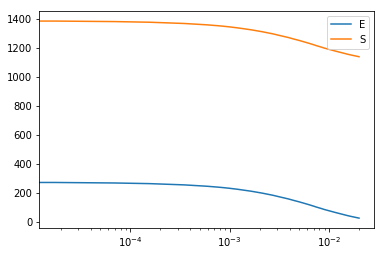

In [6]:
kf=10.
phit=0.001
L=1.0
dur=0.02#1e4
simrun=100
phis=[0.5]
for phi in phis:
    jobs = [{'kf':kf,'phit':phit,'phi':phi,'L':L,'duration':dur}]
    exe(jobs,simrun)